# ДОСЛІДНИЦЬКИЙ АНАЛІЗ ДАНИХ (EDA) НА ПРИКЛАДІ ДАТАСЕТУ TITANIC

## 📚 Розділ 1: Вступ до Exploratory Data Analysis

### 1.1 Що таке EDA?

**Exploratory Data Analysis (EDA)** — дослідницький аналіз даних — це один з найважливіших етапів будь-якого проєкту з Data Science. EDA допомагає:

- 🔍 Зрозуміти структуру даних
- 📊 Виявити закономірності та патерни
- ⚠️ Знайти аномалії та викиди
- 🧹 Підготувати датасет для моделювання

### 1.2 Датасет Titanic

**Titanic** — класичний навчальний датасет, який містить інформацію про пасажирів лайнера RMS Titanic. 

**Мета аналізу:** визначити фактори, які вплинули на виживання пасажирів.

---

## 📚 Розділ 2: Завантаження та огляд даних

### 2.1 Імпорт бібліотек

```python
import pandas as pd          # Робота з даними
import numpy as np           # Числові операції
import matplotlib.pyplot as plt  # Візуалізація
import seaborn as sns        # Статистичні графіки
%matplotlib inline           # Відображення в notebook
```

**Пояснення:**
- `pandas` — основна бібліотека для роботи з таблицями (DataFrame)
- `numpy` — математичні операції над масивами
- `matplotlib` і `seaborn` — створення графіків і візуалізацій

### 2.2 Завантаження датасету

```python
train = pd.read_csv('titanic_train.csv')
train.head()
```

**Ключові колонки:**
- `Survived` — виживання (1 = вижив, 0 = загинув)
- `Pclass` — клас квитка (1, 2, 3)
- `Sex` — стать (male/female)
- `Age` — вік пасажира
- `Fare` — вартість квитка
- `Embarked` — порт посадки (C, Q, S)

---

## 📚 Розділ 3: Візуалізація пропущених даних

### 3.1 Heatmap відсутніх значень

```python
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
```

**Що показує графік:**
- Жовті лінії = пропущені значення
- Фіолетовий = наявні дані
- Колонка `Cabin` має багато пропусків
- `Age` і `Embarked` мають деякі пропуски

**Висновок:** Потрібно обробити пропущені значення перед моделюванням.

---

## 📚 Розділ 4: Аналіз розподілів

### 4.1 Загальне виживання

```python
sns.countplot(x='Survived', data=train, palette='rainbow')
```

**Інтерпретація:**
- 0 = загинув
- 1 = вижив
- Більше людей загинуло, ніж вижило

### 4.2 Виживання за статтю

```python
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')
```

**Ключовий висновок:** 
🚺 Жінки мали значно вищий шанс виживання, ніж чоловіки (правило "жінки та діти першими")

### 4.3 Виживання за класом

```python
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')
```

**Ключовий висновок:**
🎩 Пасажири 1-го класу мали найвищі шанси на виживання порівняно з 2-м і 3-м класами

### 4.4 Розподіл віку

```python
train['Age'].hist(bins=30, color='green', alpha=0.3)
sns.displot(train['Age'].dropna(), kde=False, color='darkred', bins=40)
```

**Спостереження:**
- Більшість пасажирів були віком 20-40 років
- Діти та літні люди — менша частина

### 4.5 Кількість родичів на борту

```python
sns.countplot(x='SibSp', data=train)
```

**SibSp** = Siblings/Spouses (брати, сестри, подружжя)

---

## 📚 Розділ 5: Очищення даних

### 5.1 Проблема пропущених значень віку

**Підхід:** Замість простого видалення рядків, використаємо **розумну імпутацію** на основі класу пасажира.

### 5.2 Аналіз віку по класах

```python
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')
```

**Спостереження:**
- 1-й клас: середній вік ~37 років
- 2-й клас: середній вік ~29 років
- 3-й клас: середній вік ~24 роки

### 5.3 Функція імпутації

```python
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
```

**Логіка:**
- Якщо вік відсутній → підставляємо середній вік для відповідного класу
- Якщо вік є → залишаємо його без змін

### 5.4 Застосування імпутації

```python
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)
```

### 5.5 Видалення проблемних колонок

```python
# Видаляємо Cabin (забагато пропусків)
train.drop('Cabin', axis=1, inplace=True)

# Видаляємо рядки з іншими пропусками
train.dropna(inplace=True)
```

---

## 📚 Розділ 6: Конвертація категоріальних змінних

### 6.1 Проблема категоріальних даних

**Машинне навчання працює тільки з числами!**

Категоріальні змінні (`Sex`, `Embarked`) потрібно перетворити на числові.

### 6.2 Створення dummy-змінних

```python
# Стать: male → 1, female → 0
sex = pd.get_dummies(train['Sex'], drop_first=True)

# Порт посадки: C, Q, S → три колонки (одну викидаємо)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
```

**Параметр `drop_first=True`:**
- Уникає проблеми мультиколінеарності
- Якщо `male=0`, то автоматично `female=1`

### 6.3 Видалення оригінальних колонок

```python
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
```

**Чому видаляємо:**
- `Sex`, `Embarked` — замінили на dummy
- `Name`, `Ticket` — не несуть статистичної інформації

### 6.4 Об'єднання з основним датасетом

```python
train = pd.concat([train, sex, embark], axis=1)
```

**Результат:** Датасет готовий для машинного навчання!

---

## 📚 Розділ 7: Побудова моделі логістичної регресії

### 7.1 Що таке логістична регресія?

**Логістична регресія** — метод машинного навчання для **класифікації** (не для регресії, незважаючи на назву!).

**Використовується для бінарної класифікації:**
- Так/Ні
- Виграш/Програш
- Вижив/Загинув

### 7.2 Розділення на навчальну та тестову вибірки

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Survived', axis=1),  # X = ознаки
    train['Survived'],                # y = цільова змінна
    test_size=0.3,                    # 30% на тестування
    random_state=101                  # фіксоване значення
)
```

**Пояснення параметрів:**
- `test_size=0.3` — 30% даних для тестування, 70% для навчання
- `random_state=101` — забезпечує відтворюваність результатів

**Навіщо розділяти?**
- **Навчальна вибірка:** модель "вчиться" на цих даних
- **Тестова вибірка:** перевіряємо, наскільки добре модель навчилася

### 7.3 Навчання моделі

```python
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
```

**Що відбувається:**
- Модель аналізує зв'язки між ознаками (стать, клас, вік) і виживанням
- Наприклад: "Якщо жінка з 1-го класу, молода → висока ймовірність виживання"

### 7.4 Передбачення

```python
predictions = logmodel.predict(X_test)
```

**Результат:** Модель передбачає для кожного пасажира з тестової вибірки: вижив (1) чи ні (0)

### 7.5 Оцінка моделі

#### a) Confusion Matrix (Матриця плутанини)

```python
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)
```

**Структура матриці:**
```
              Predicted: 0   Predicted: 1
Actual: 0     [TN]           [FP]
Actual: 1     [FN]           [TP]
```

- **TN** (True Negative) — правильно передбачено "загинув"
- **TP** (True Positive) — правильно передбачено "вижив"
- **FP** (False Positive) — помилково передбачено "вижив"
- **FN** (False Negative) — помилково передбачено "загинув"

#### b) Accuracy Score (Точність)

```python
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")  # Наприклад: 0.85
```

**Інтерпретація:**
- 0.85 = 85% передбачень правильні
- Чим вище, тим краще
- 100% зазвичай означає перенавчання (overfitting)

---

## 📚 Розділ 8: Висновки EDA

### 8.1 Що ми зробили:

✅ **Дослідили дані** візуально та статистично  
✅ **Обробили пропущені значення** через розумну імпутацію  
✅ **Очистили датасет** від непотрібних колонок  
✅ **Конвертували категоріальні змінні** в числові  
✅ **Побудували та оцінили прогнозну модель**

### 8.2 Ключові insights:

🚺 **Стать** — найважливіший фактор виживання (жінки мали перевагу)  
🎩 **Клас пасажира** — 1-й клас мав значно вищі шанси  
👶 **Вік** — діти та молоді люди мали кращі шанси  
💰 **Вартість квитка** — корелює з класом та виживанням

### 8.3 Навіщо потрібен EDA?

EDA не тільки готує дані для моделювання, але й допомагає **зрозуміти історію за числами**. 

Датасет Titanic — ідеальна відправна точка для розвитку інтуїції EDA та навичок Data Science.

---

## 🎯 Практичні поради

### Для студентів:

1. **Завжди починайте з EDA** перед будь-яким моделюванням
2. **Візуалізуйте дані** — графіки показують те, що статистика може приховати
3. **Обробляйте пропуски розумно** — не просто видаляйте дані
4. **Розумійте свої дані** — це важливіше за складні алгоритми

### Типові помилки:

❌ Пропуск EDA і одразу моделювання  
❌ Видалення всіх рядків з пропусками  
❌ Неконвертування категоріальних змінних  
❌ Відсутність розділення на train/test  

---

## 📖 Рекомендована література

1. **"Python for Data Analysis"** — Wes McKinney
2. **"Hands-On Machine Learning"** — Aurélien Géron
3. **Kaggle Learn** — безкоштовні курси з EDA
4. **Документація Pandas** — офіційний посібник

---

## 💡 Домашнє завдання

1. Завантажте датасет Titanic з Kaggle
2. Повторіть всі кроки EDA самостійно


In [5]:
!pip install kagglehub

EXPLORATORY DATA ANALYSIS (EDA) - TITANIC DATASET

[1/8] Завантаження датасету...
✓ Датасет завантажено
Розмір: 891 рядків, 12 колонок

=== Перші 5 рядків ===
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

=== Інформація про датасет ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age 

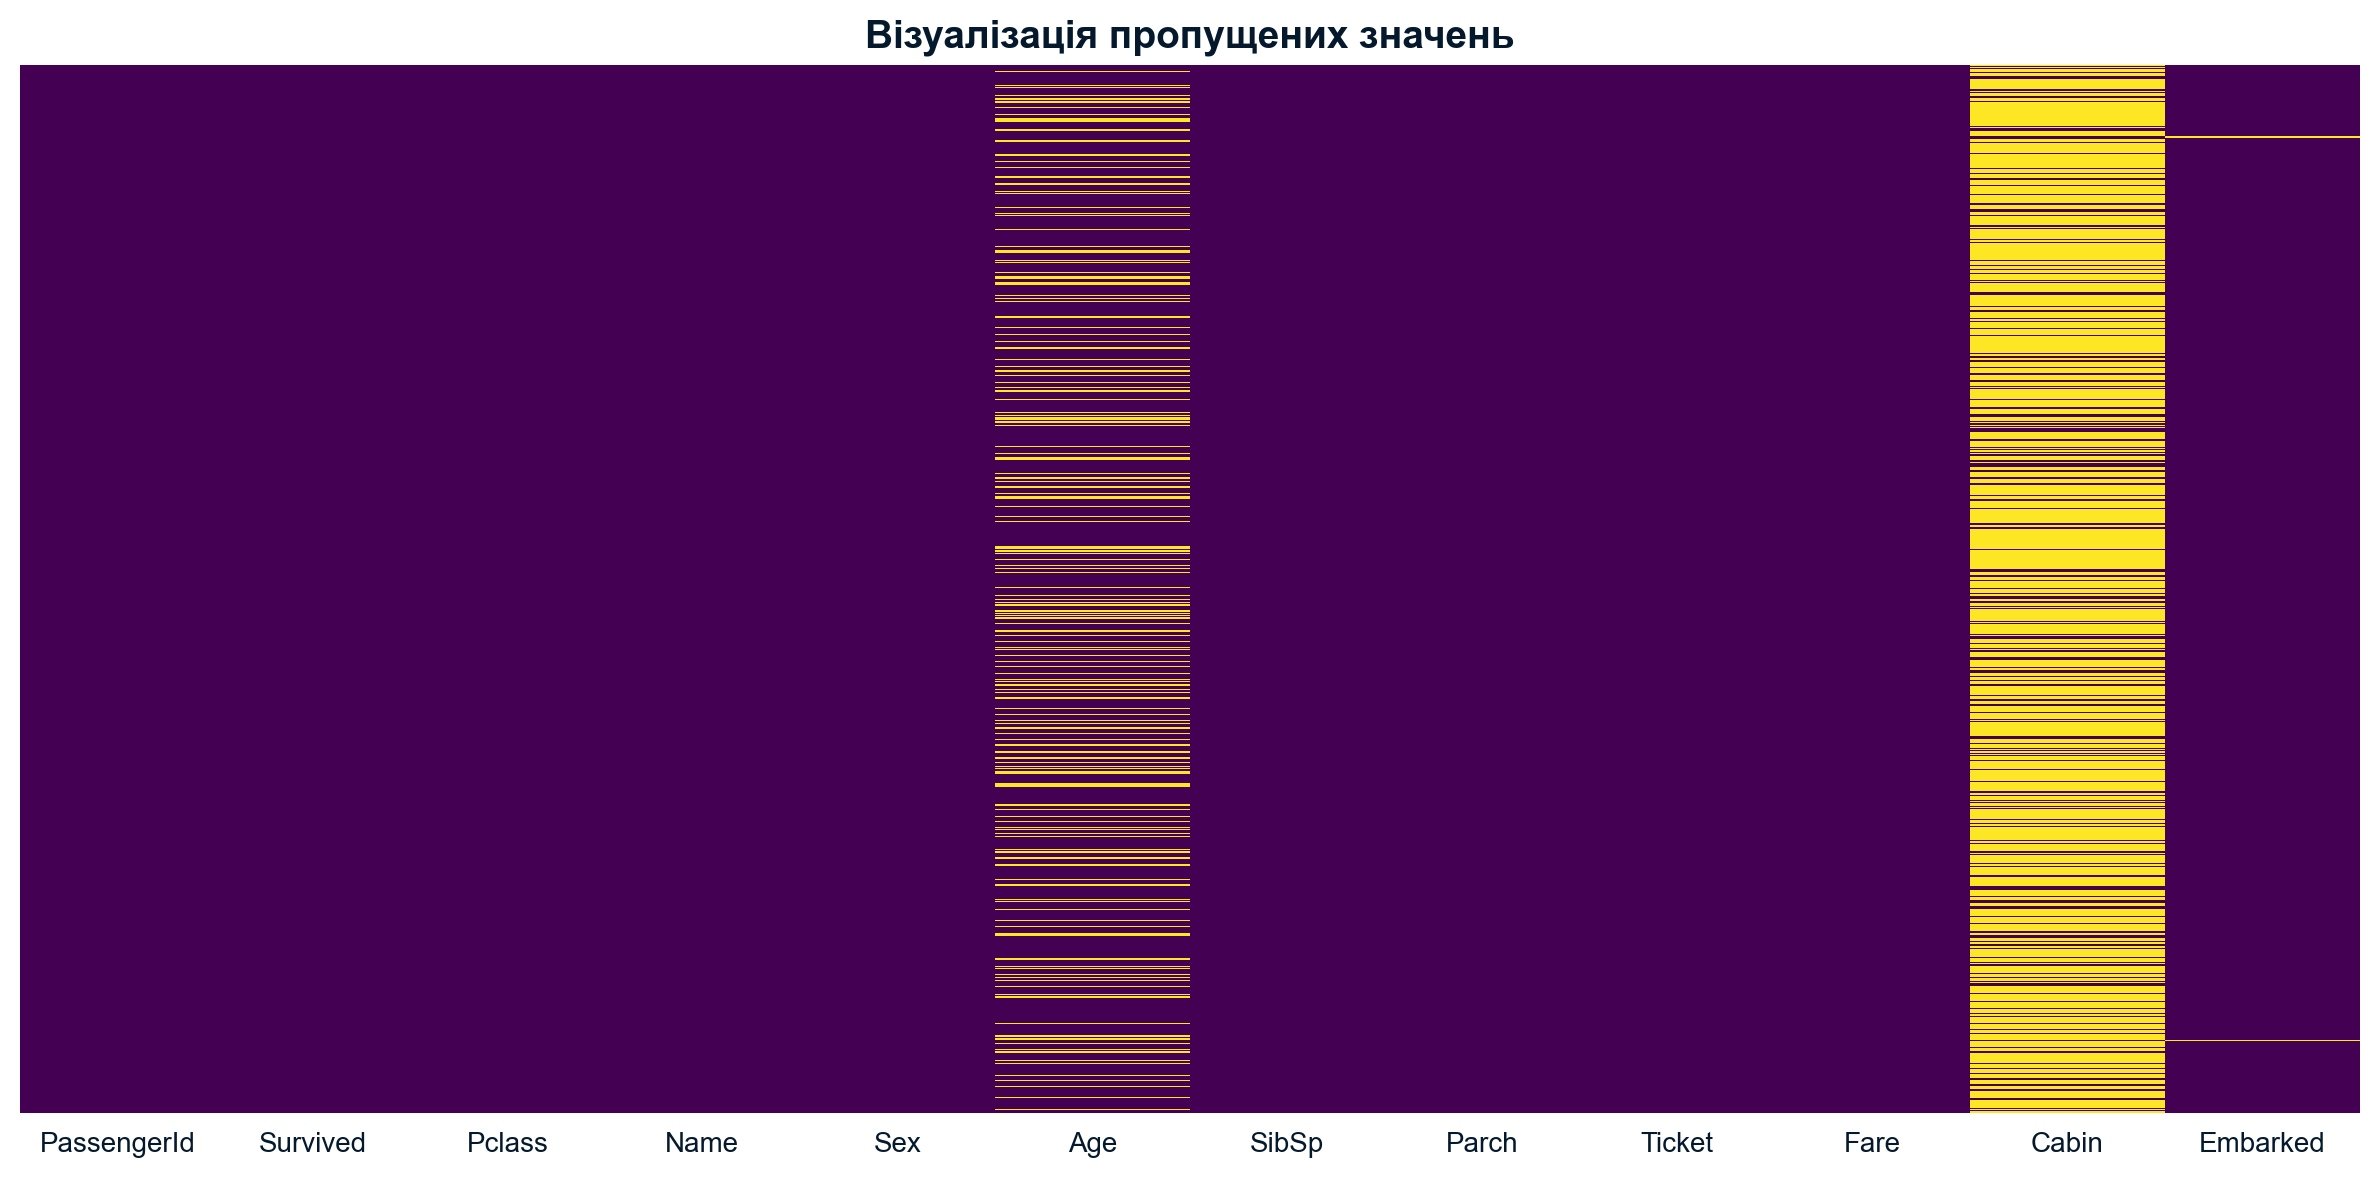

✓ Графік збережено: 01_missing_values_heatmap.png

=== Пропущені значення ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

[3/8] Аналіз розподілів...


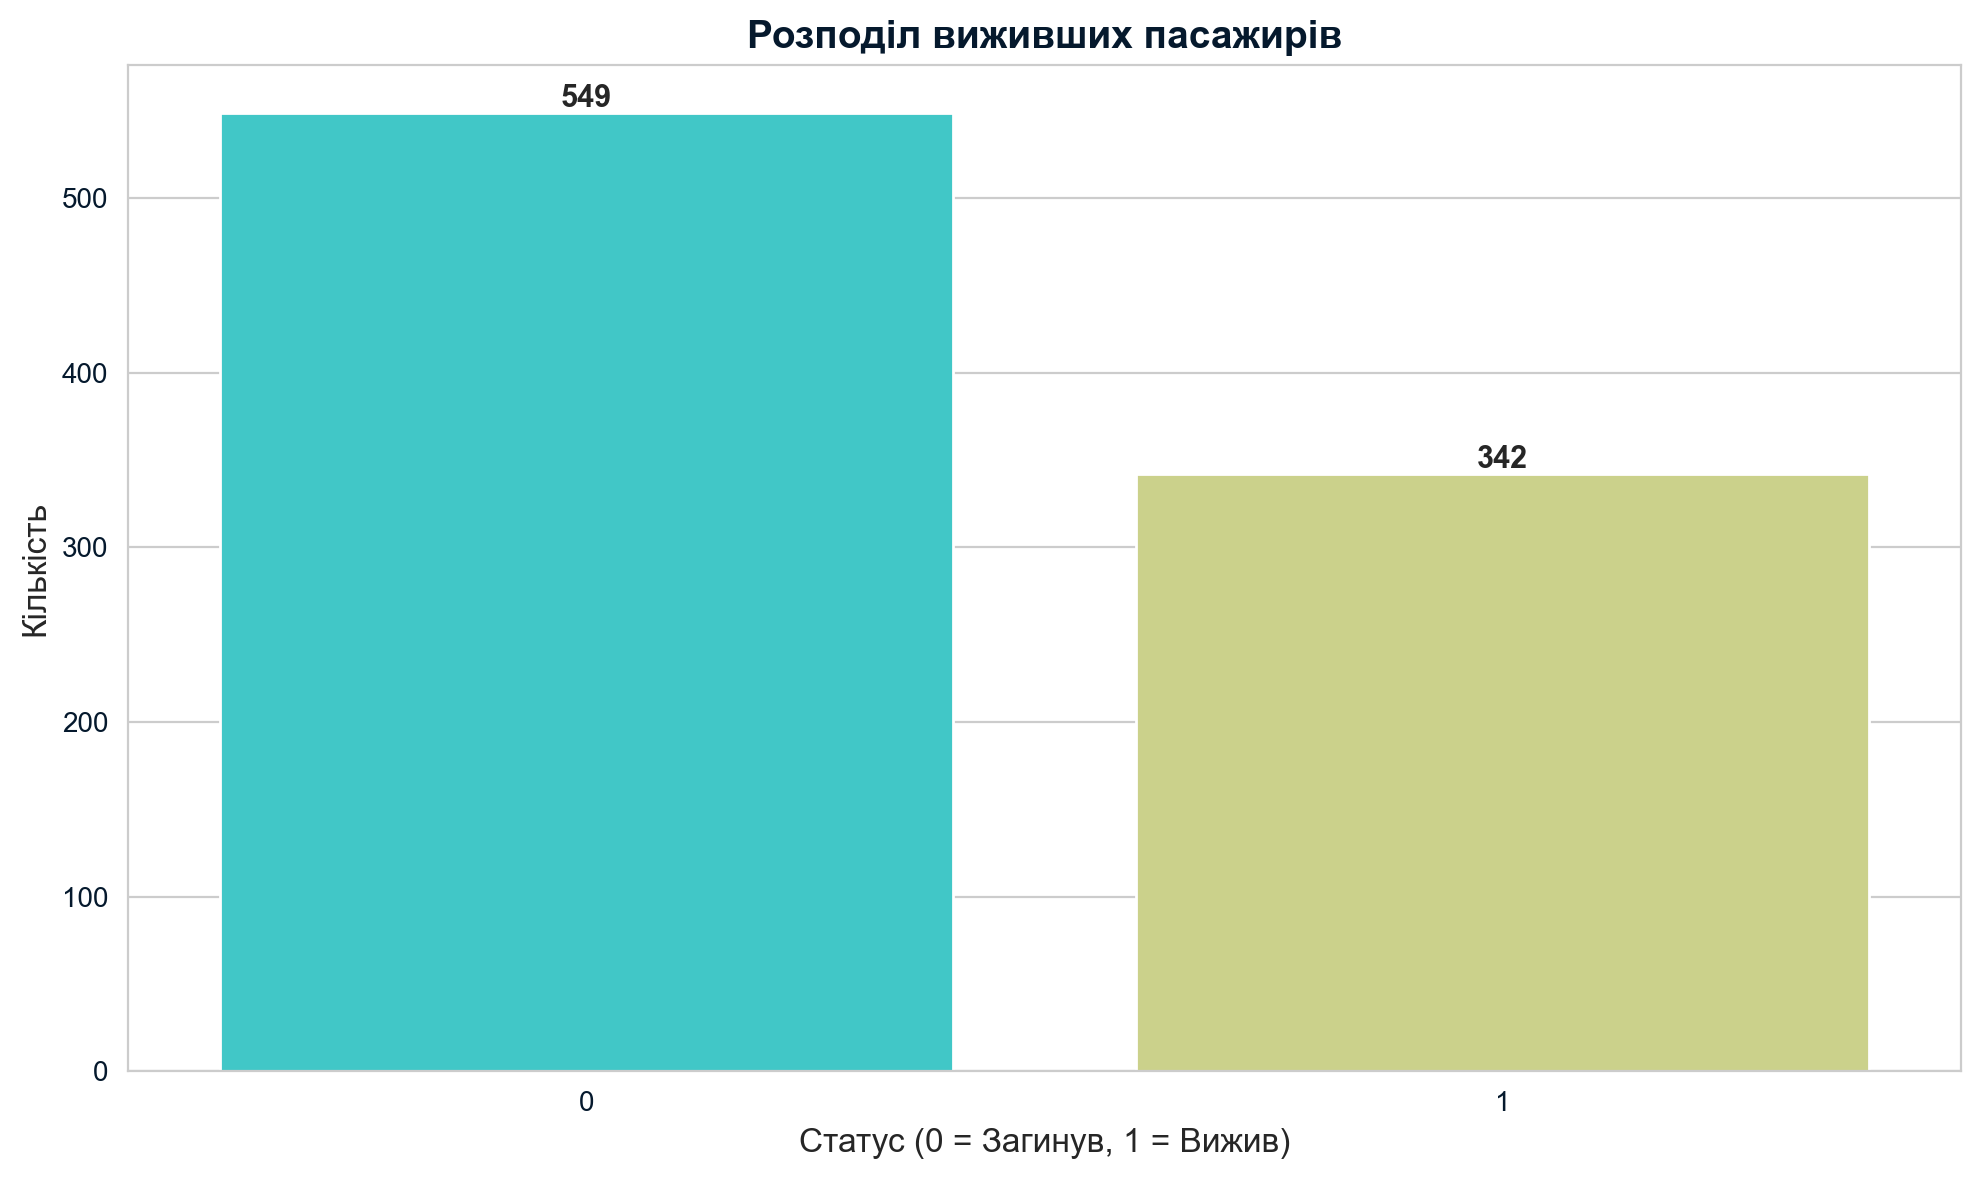

✓ Вижило: 342 осіб
✓ Загинуло: 549 осіб


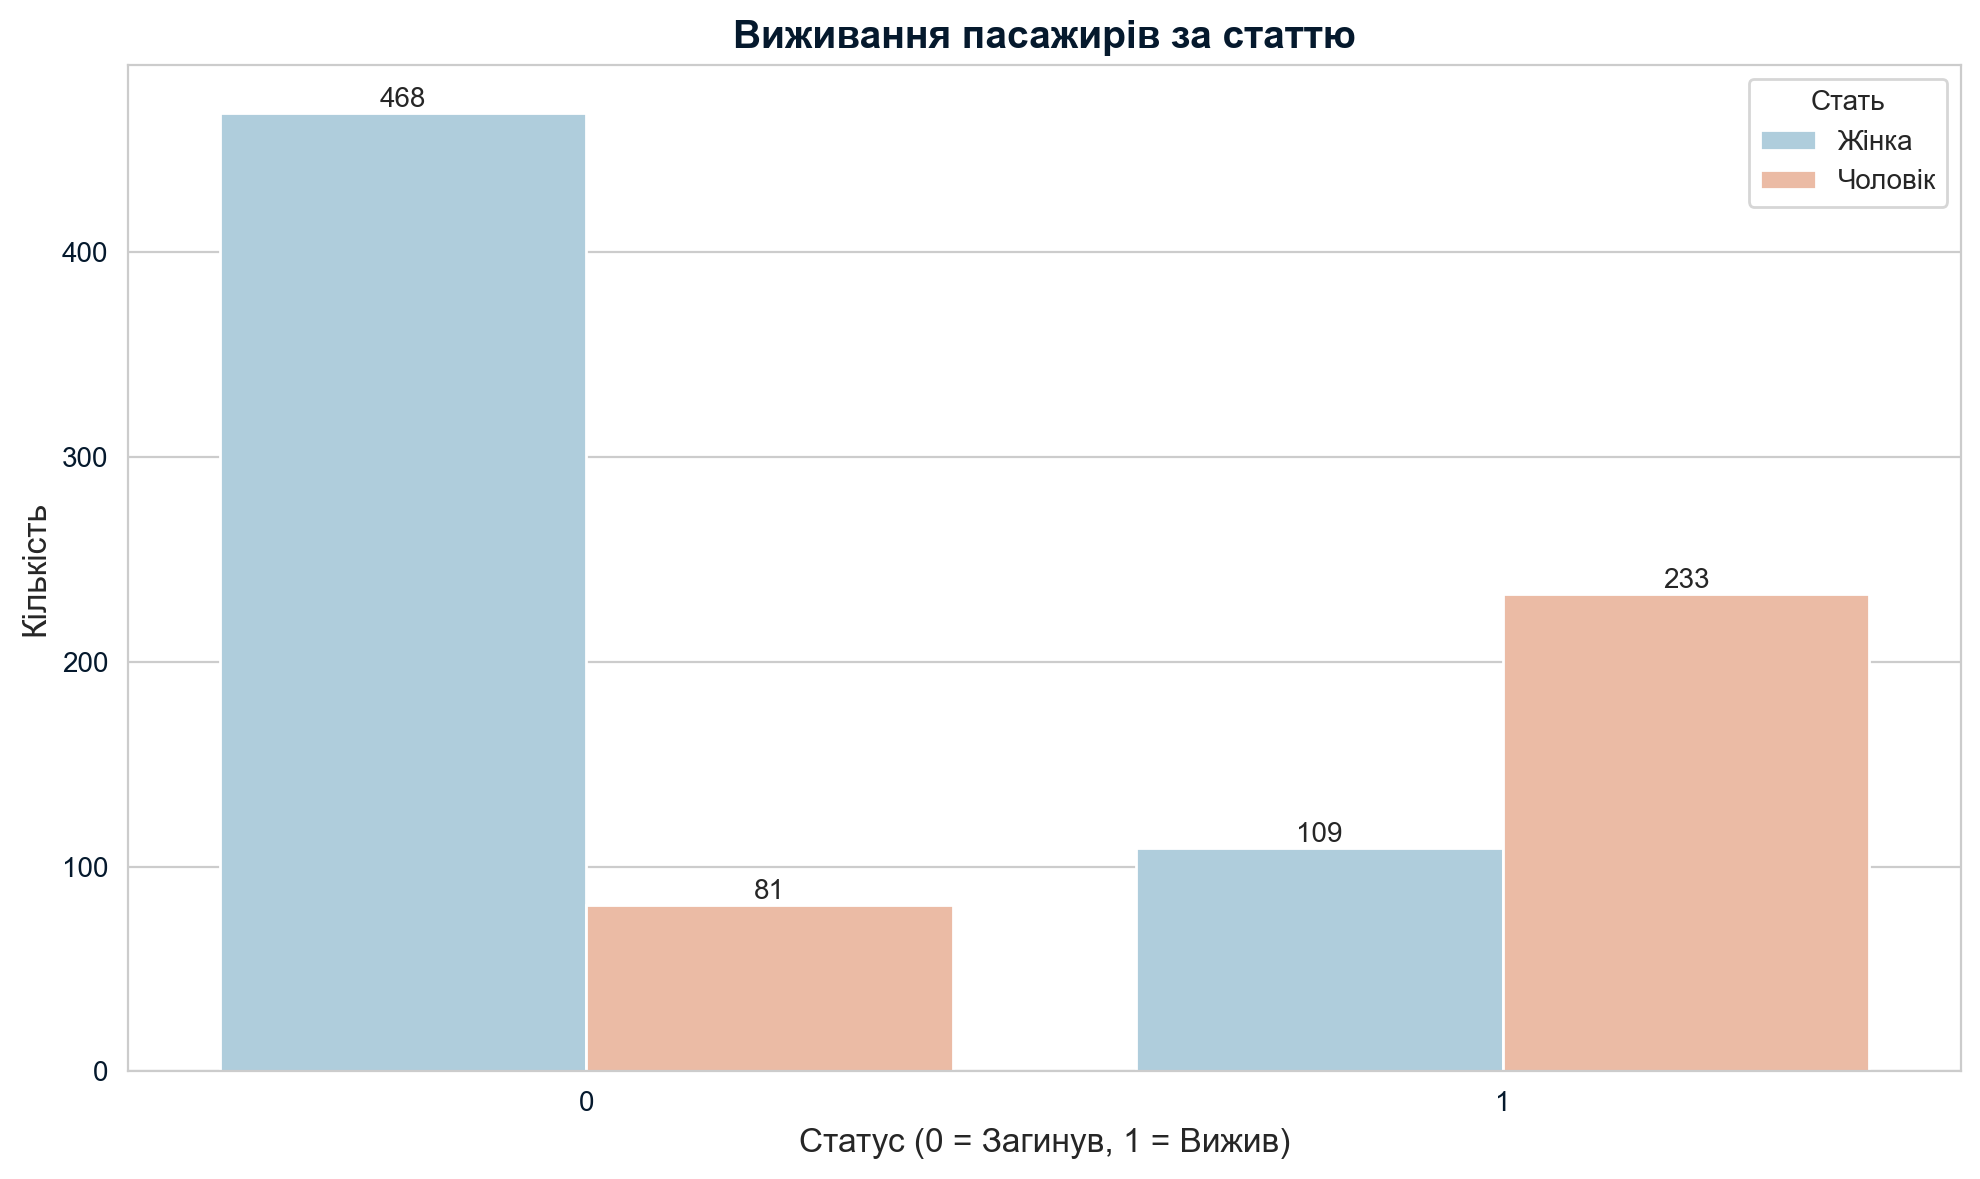


=== Виживання за статтю ===
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


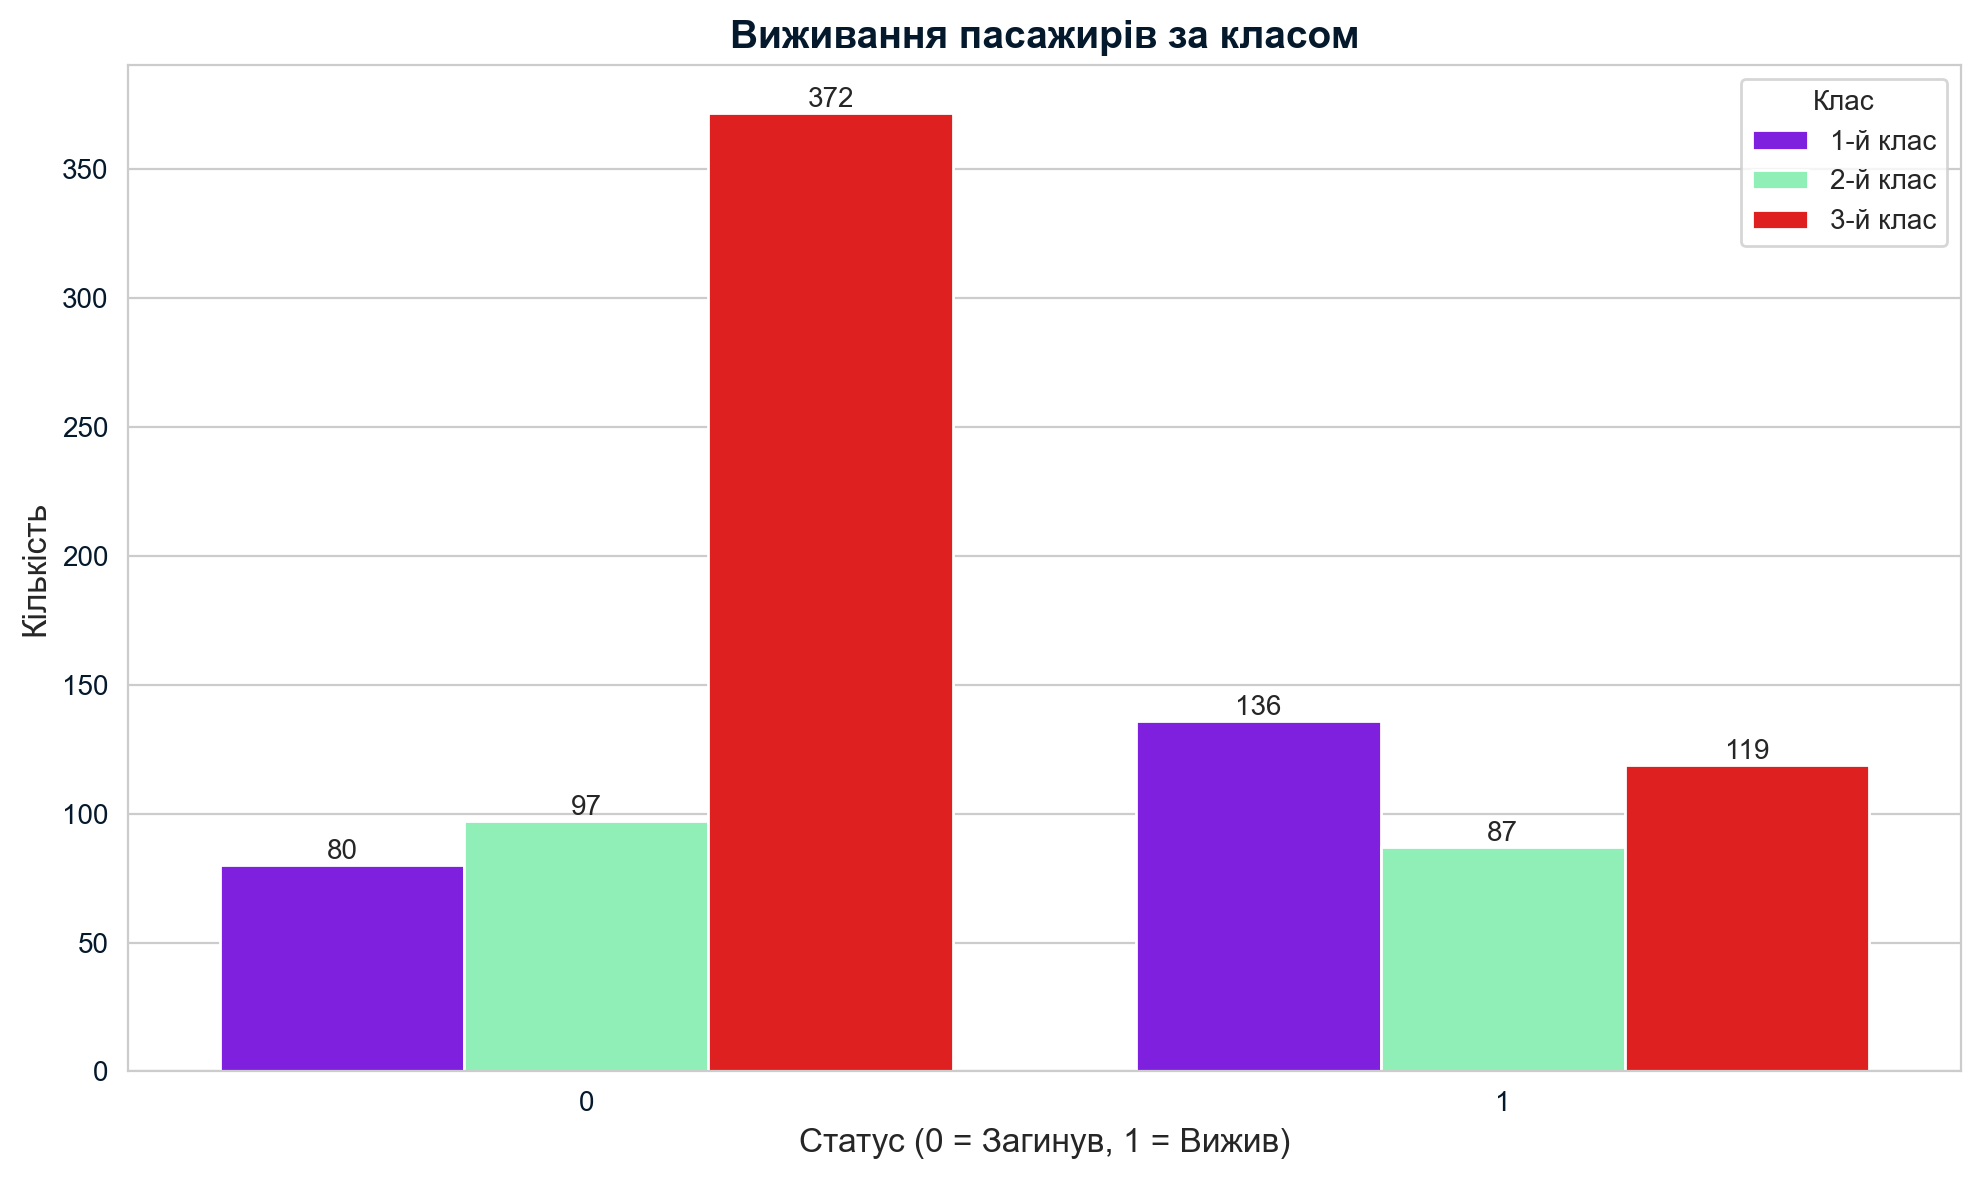


=== Виживання за класом (%) ===
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


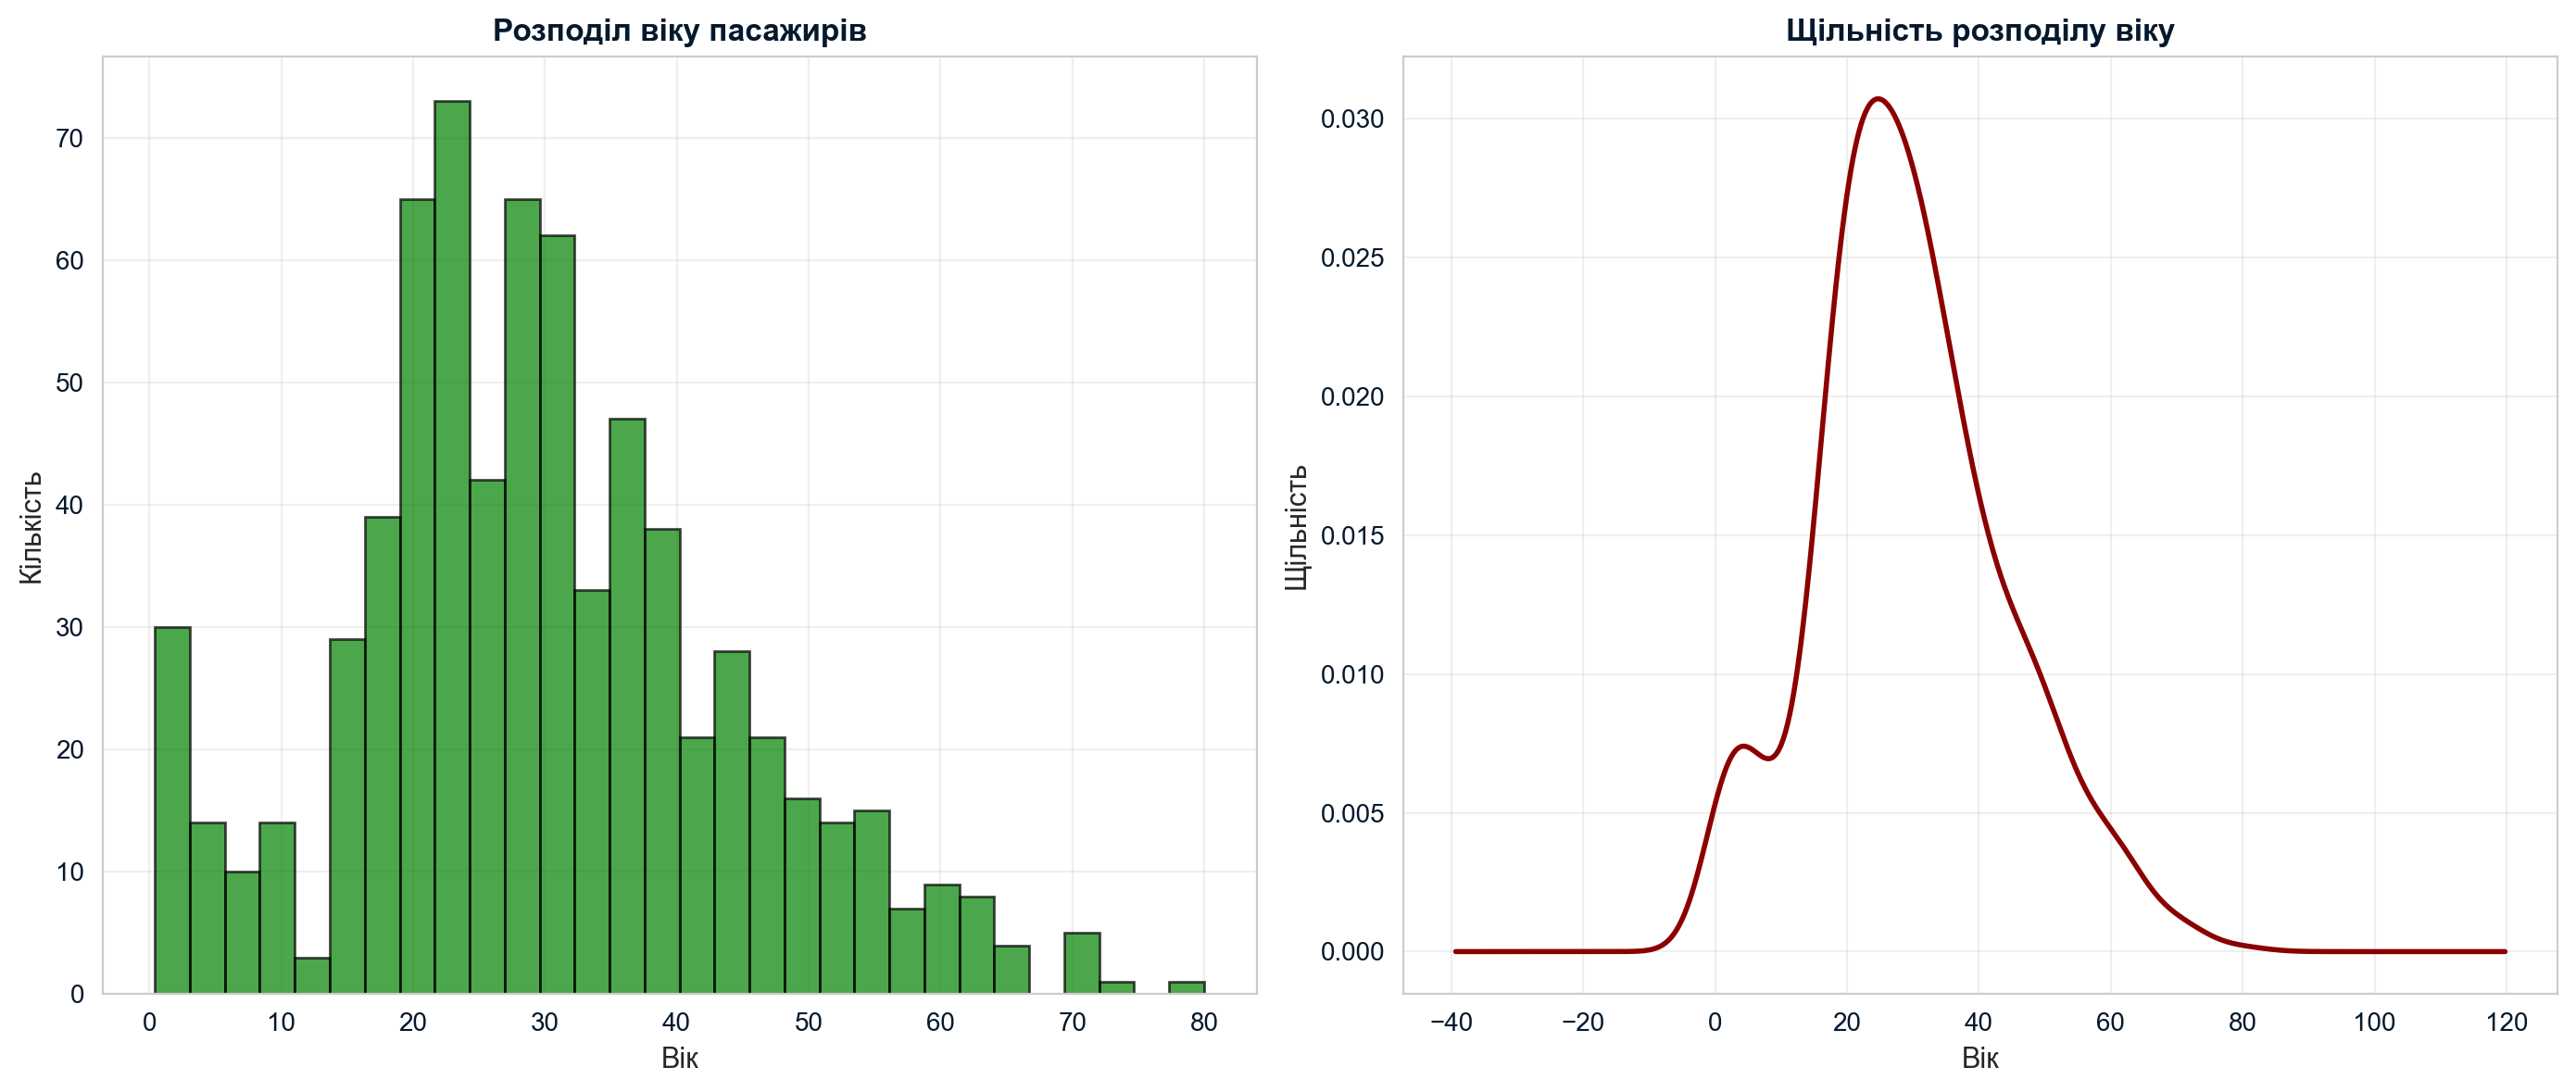

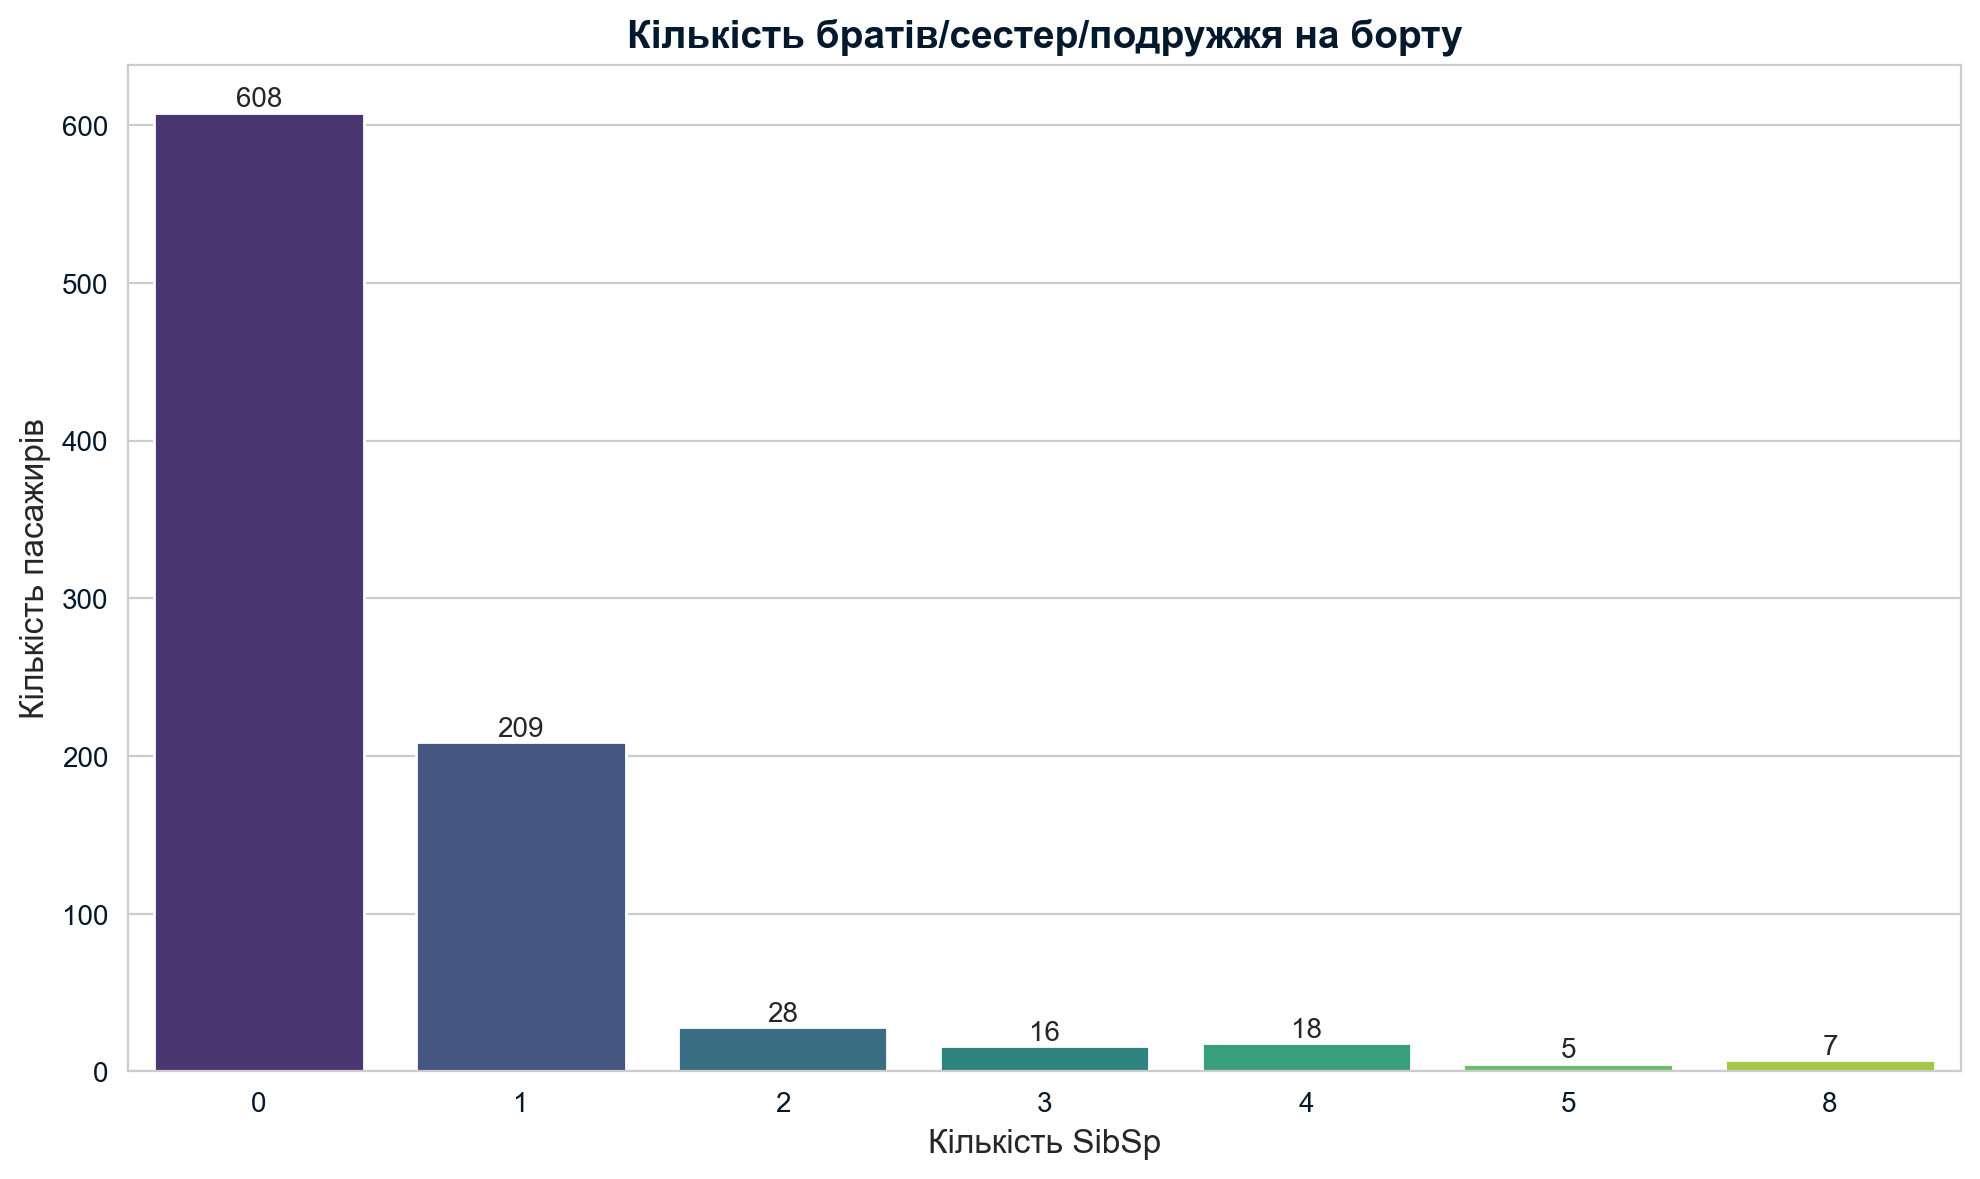


[4/8] Очищення даних...


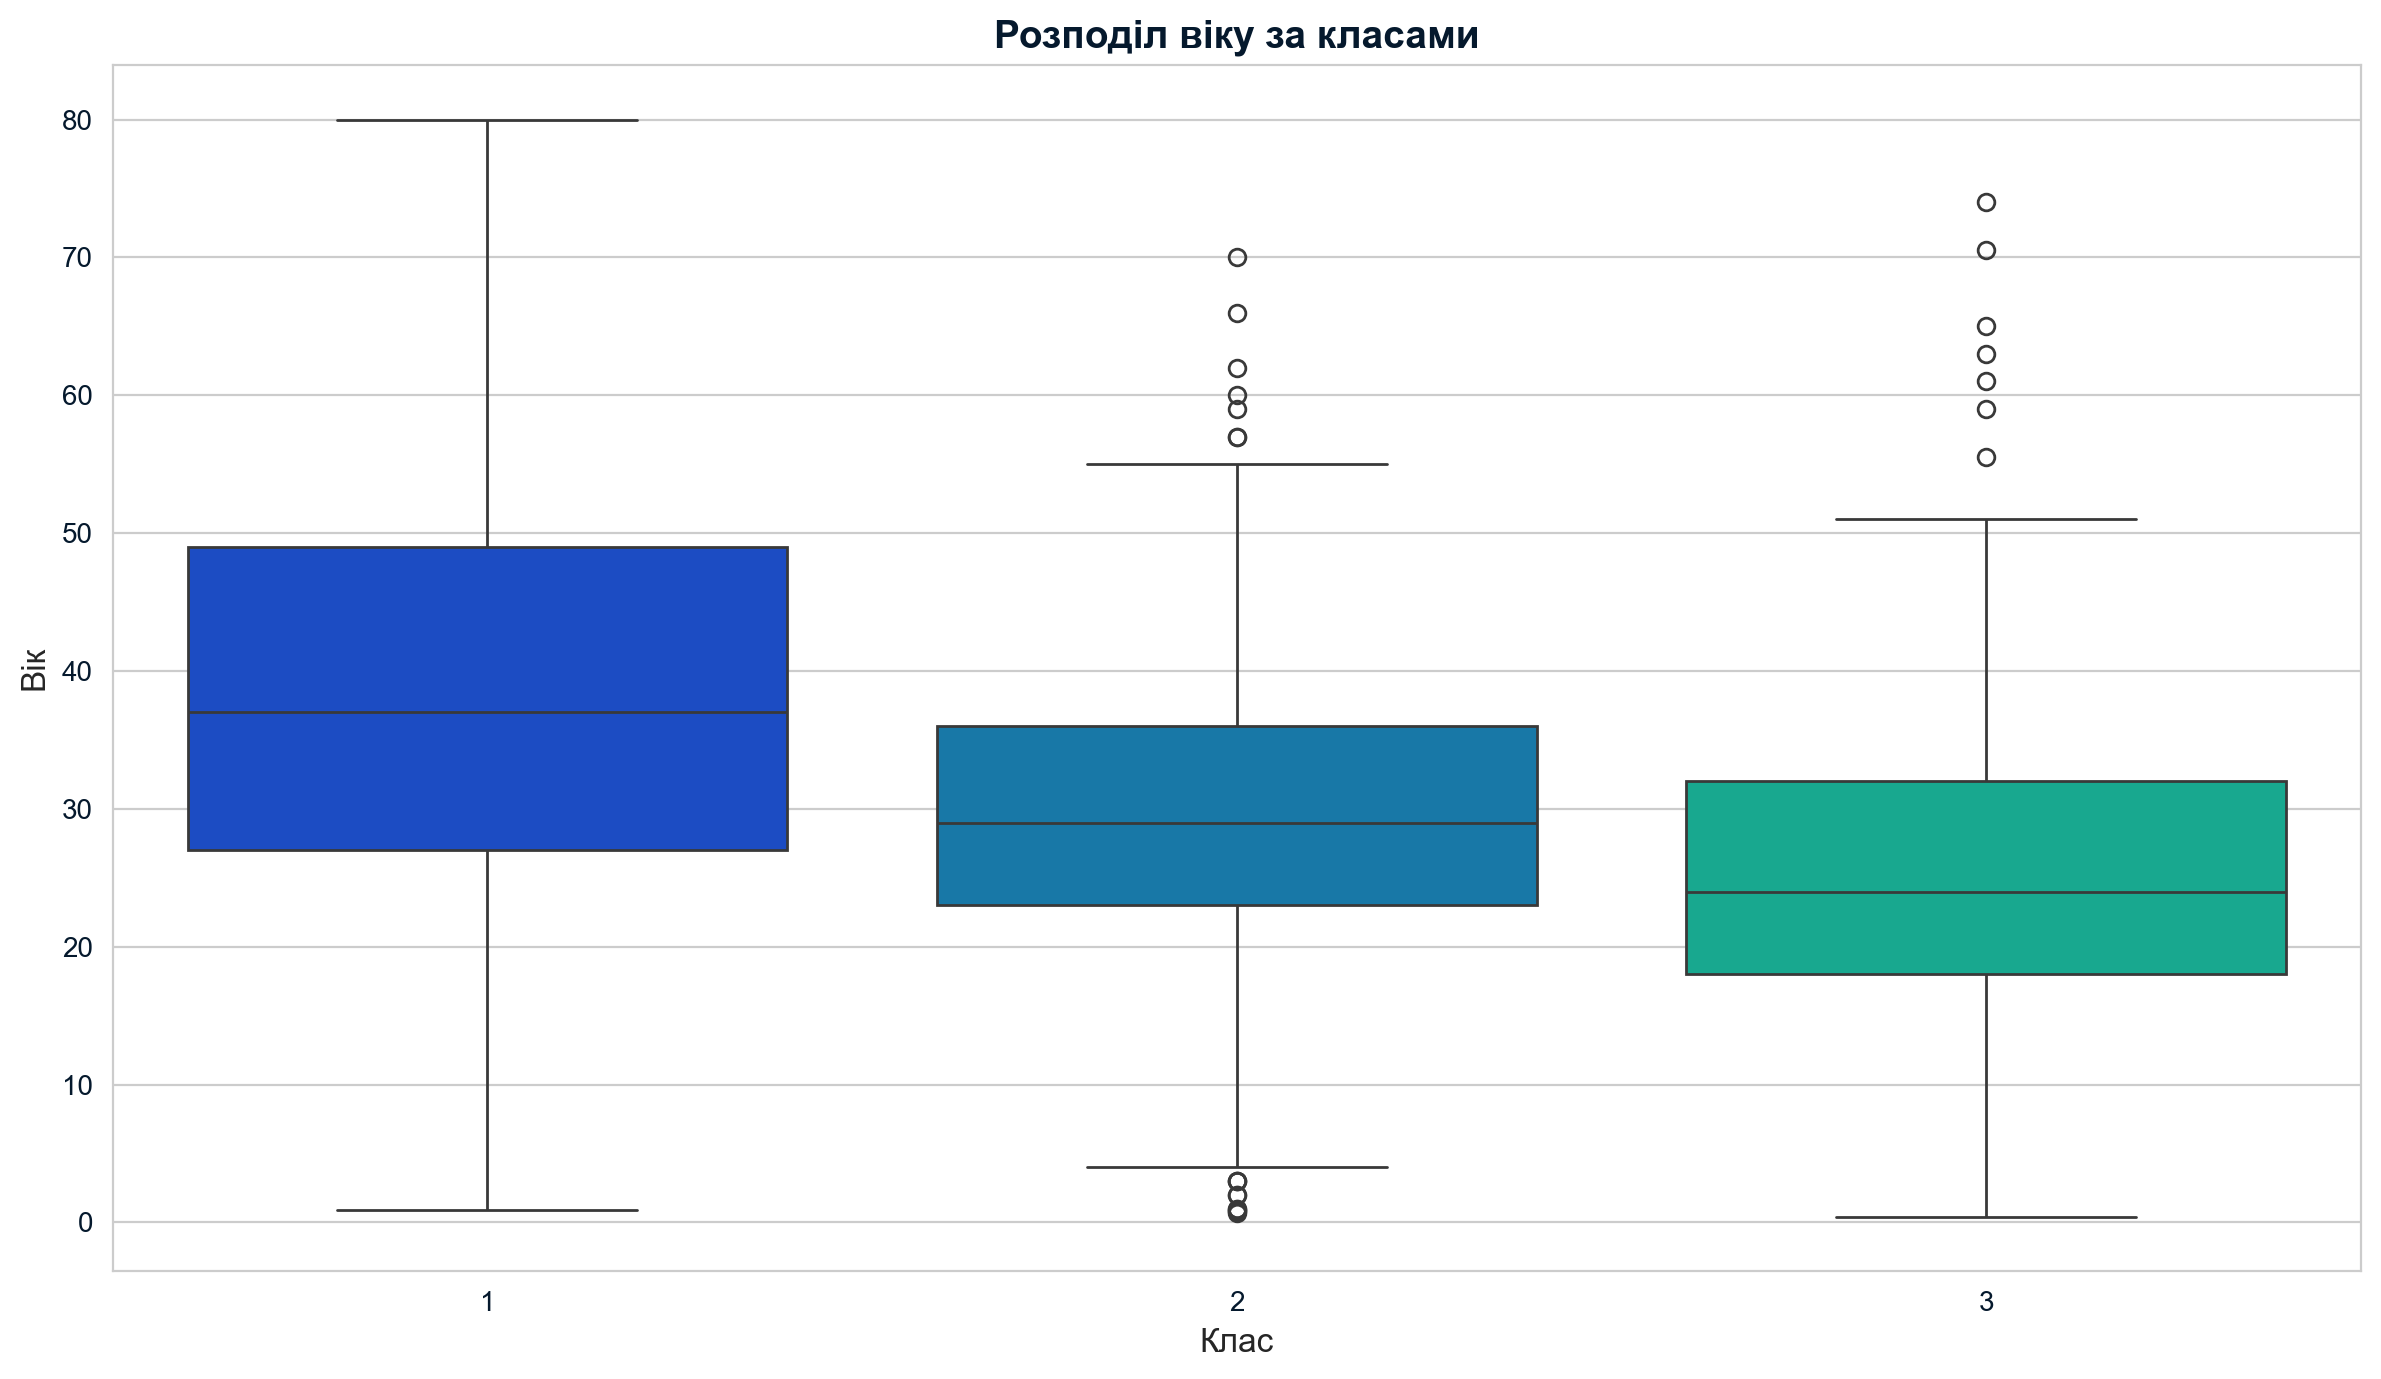


=== Середній вік по класах ===
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

=== Заповнення пропущених значень віку ===
До імпутації: 177 пропущених
Після імпутації: 0 пропущених


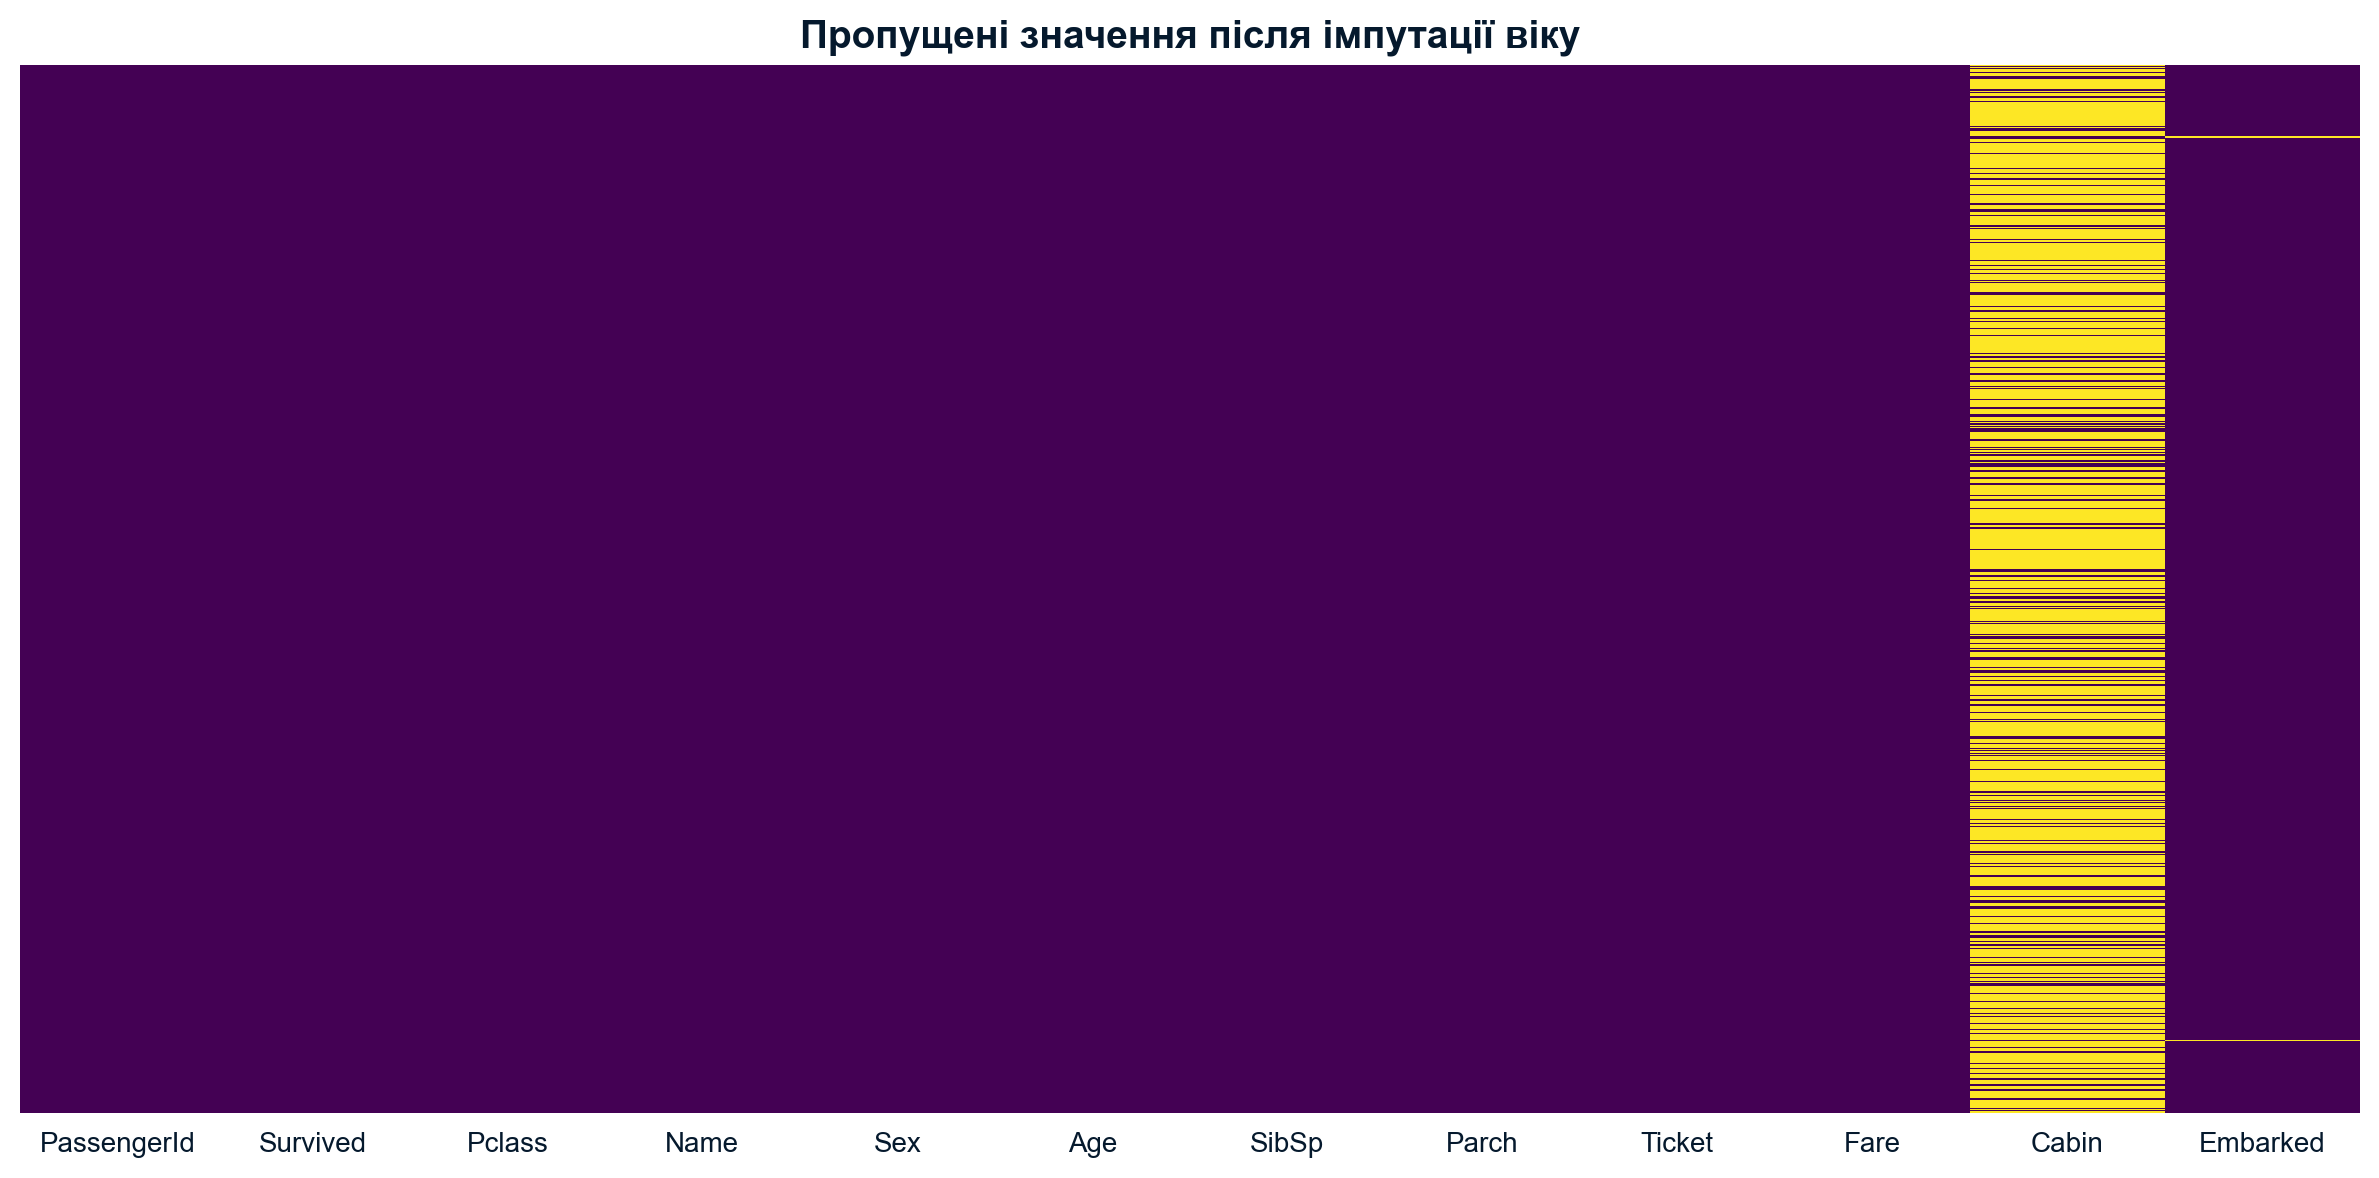


=== Видалення колонки Cabin ===
✓ Колонка Cabin видалена

=== Видалення рядків з пропусками ===
До: 891 рядків
Після: 889 рядків

✓ Дані очищено

[5/8] Конвертація категоріальних змінних...

=== Інформація до конвертації ===
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None

✓ Створено dummy змінні для Sex: ['male']
✓ Створено dummy 

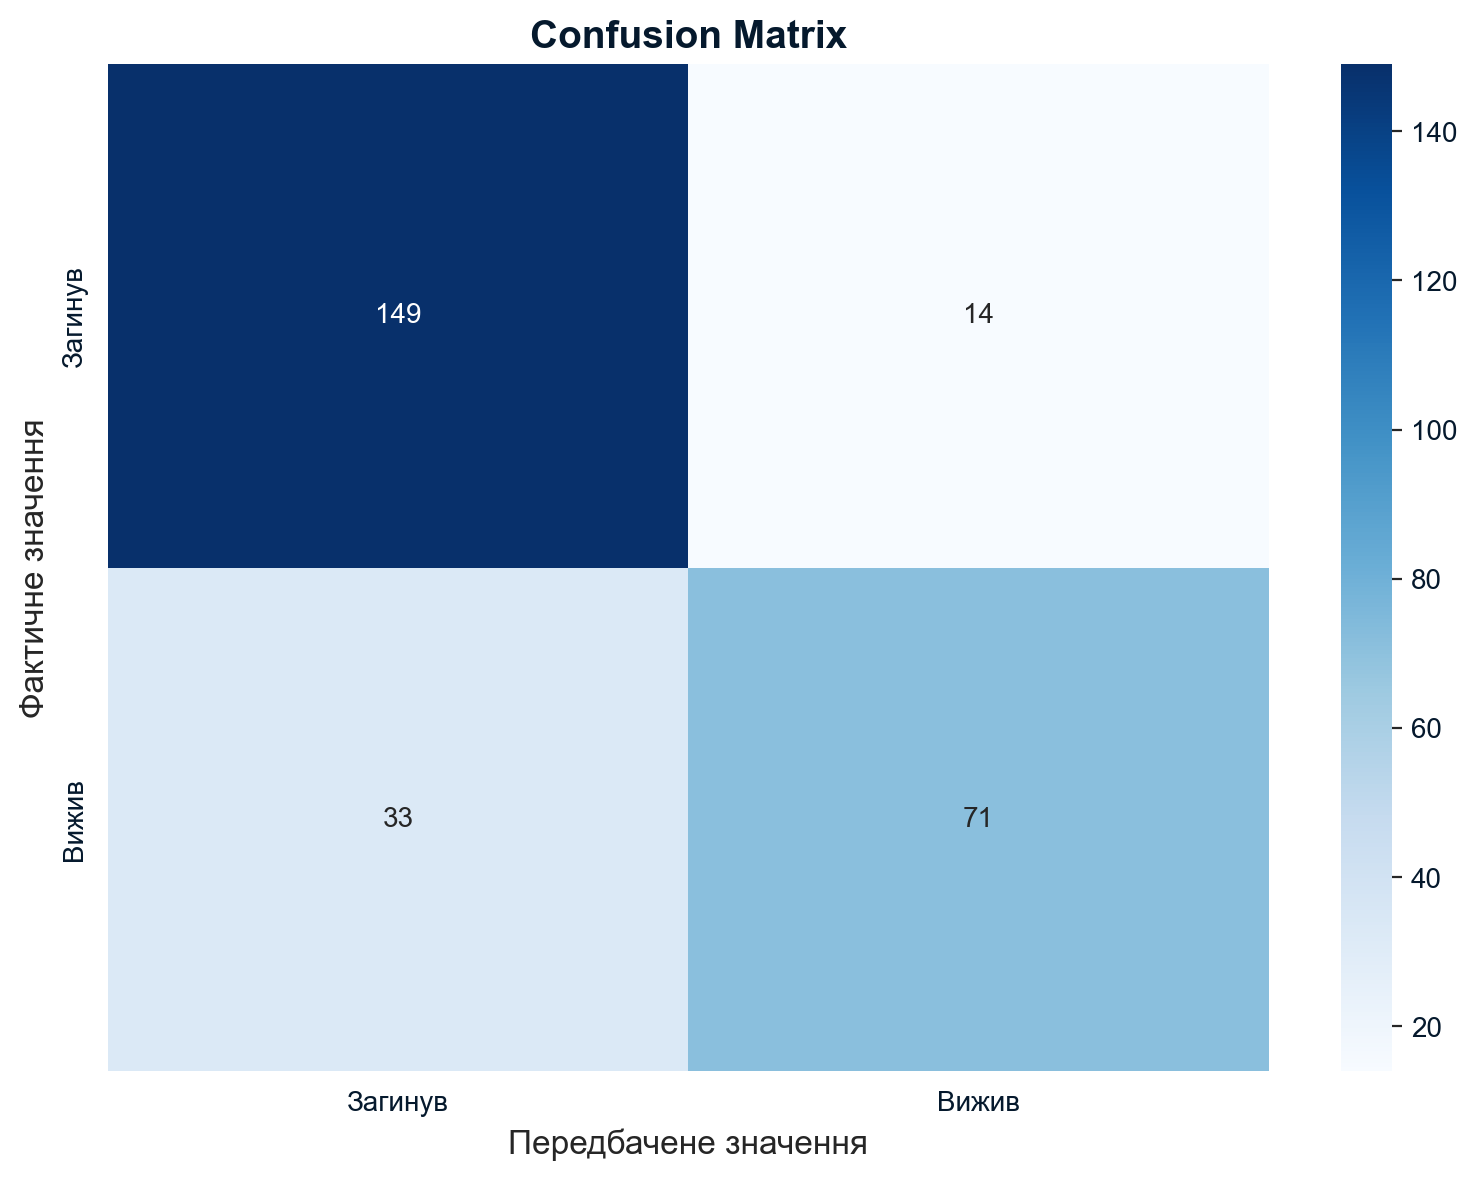


=== Accuracy Score ===
Точність моделі: 0.8240 (82.40%)

=== Classification Report ===
              precision    recall  f1-score   support

     Загинув       0.82      0.91      0.86       163
       Вижив       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267


[8/8] Створення додаткових візуалізацій...


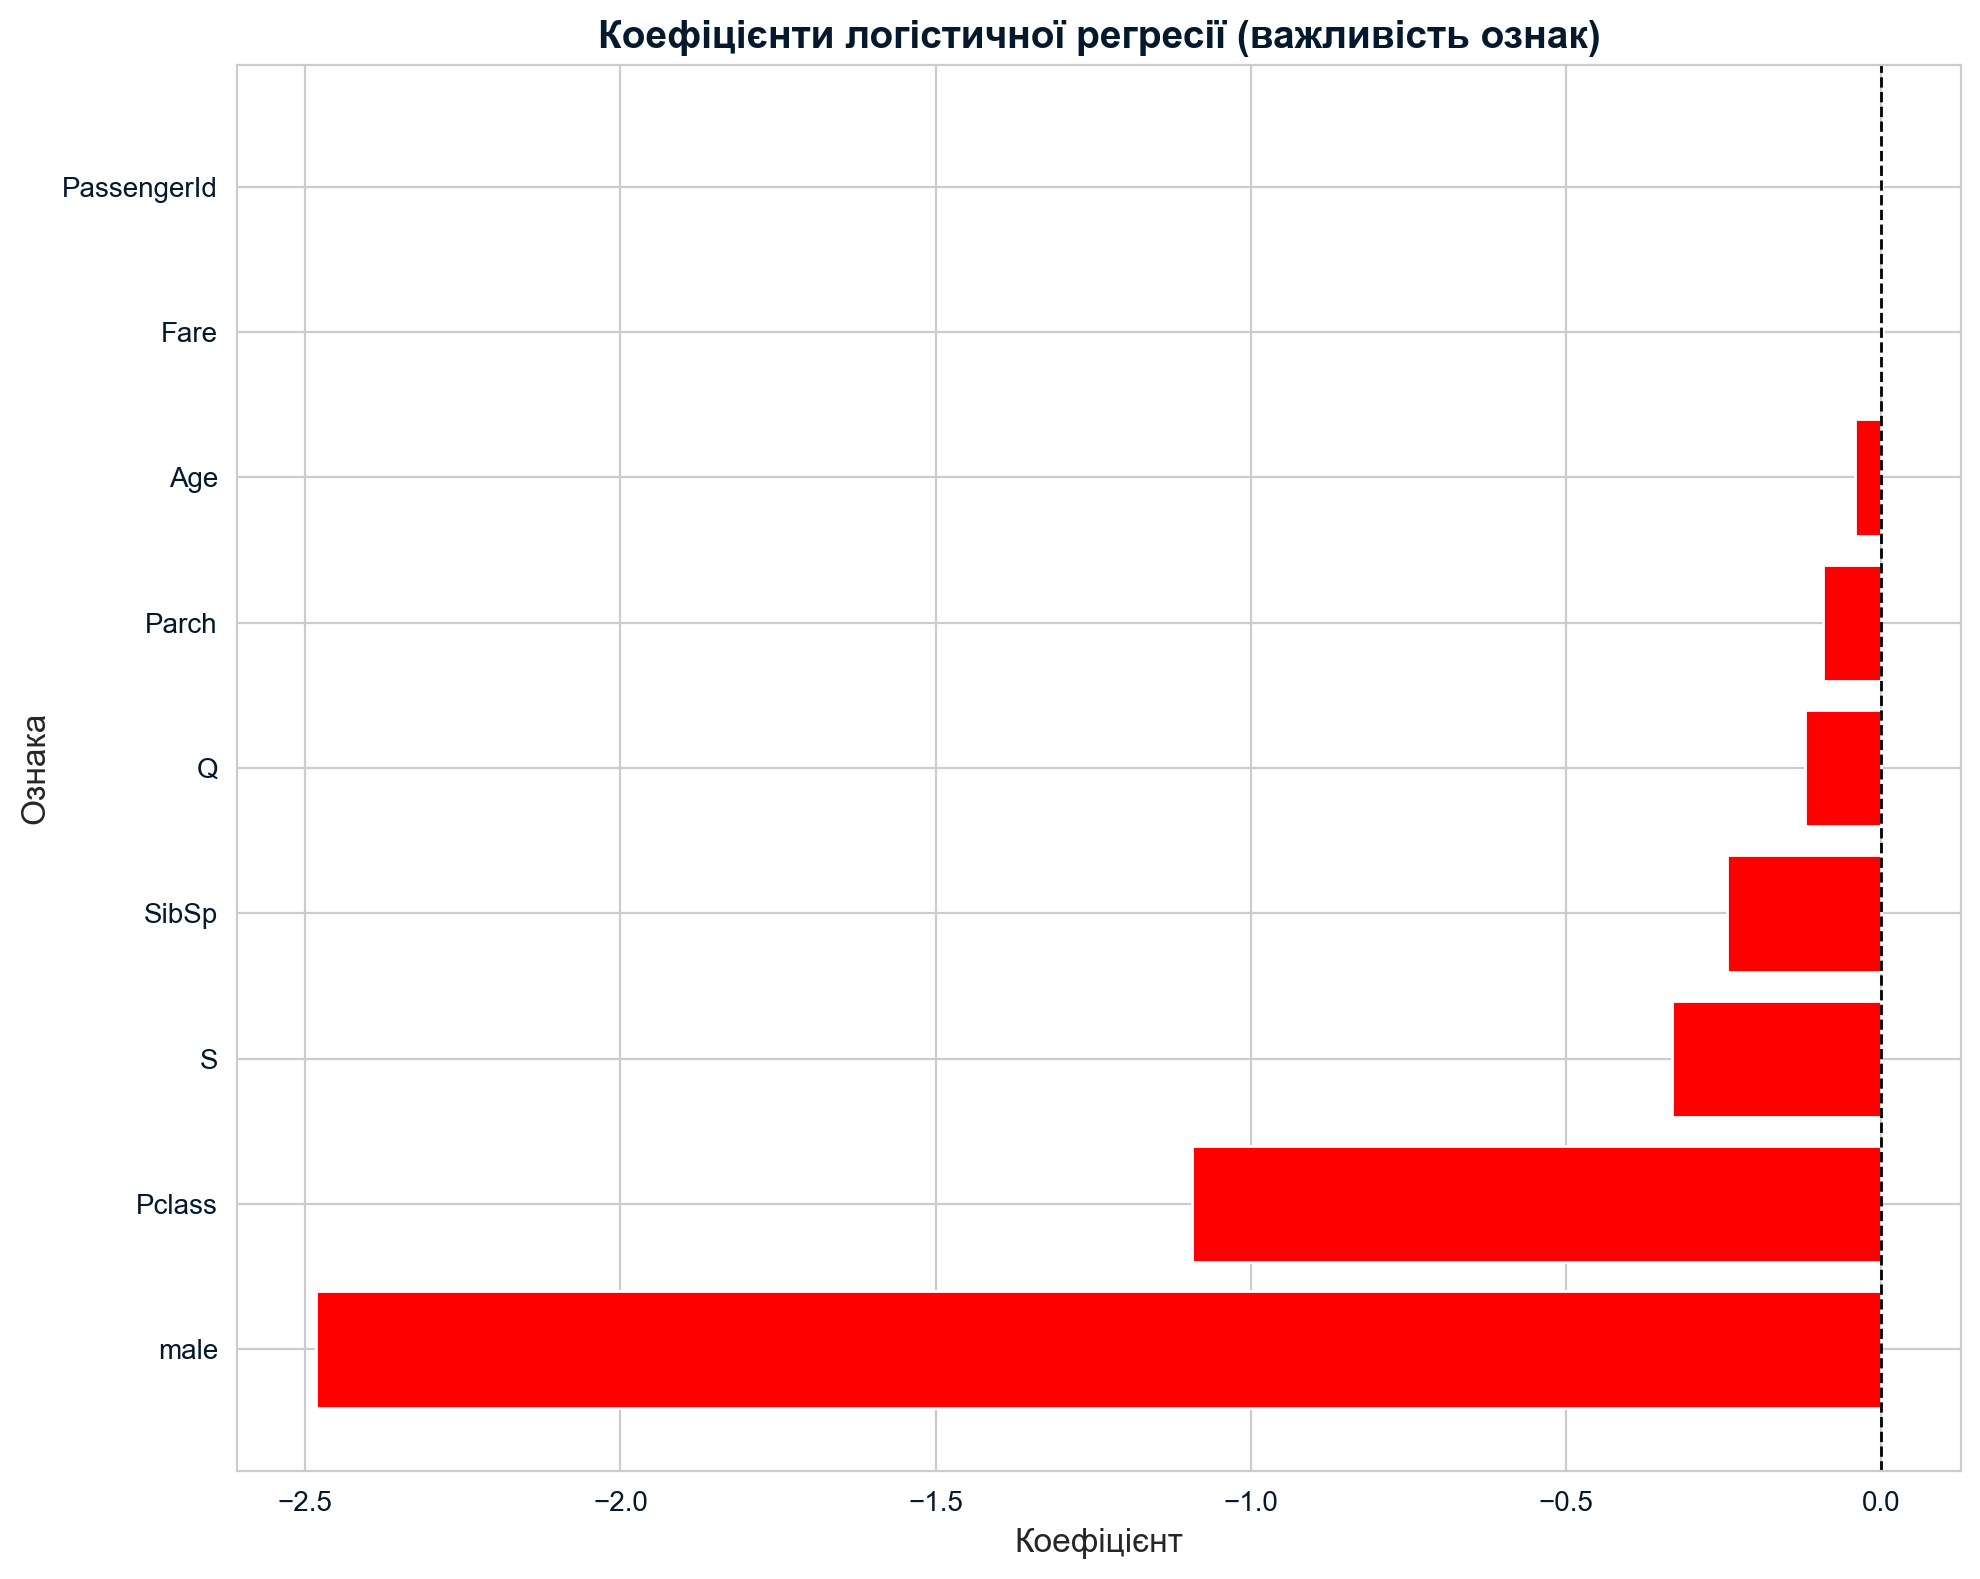

✓ Всі візуалізації створено

ПІДСУМОК

📊 ХАРАКТЕРИСТИКИ ДАТАСЕТУ:
   • Загальна кількість пасажирів: 889
   • Вижило: 340 (38.2%)
   • Загинуло: 549 (61.8%)

🎯 РЕЗУЛЬТАТИ МОДЕЛІ:
   • Точність на тестових даних: 82.40%
   • Розмір тренувального набору: 622
   • Розмір тестового набору: 267

📁 ЗБЕРЕЖЕНІ ФАЙЛИ:
    1. 01_missing_values_heatmap.png
    2. 02_survival_distribution.png
    3. 03_survival_by_sex.png
    4. 04_survival_by_class.png
    5. 05_age_distribution.png
    6. 06_sibsp_distribution.png
    7. 07_age_by_class.png
    8. 08_missing_after_age_imputation.png
    9. 09_confusion_matrix.png
   10. 10_feature_importance.png

✅ АНАЛІЗ ЗАВЕРШЕНО!


In [12]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Exploratory Data Analysis (EDA) with the Titanic Dataset
Повний код аналізу датасету Titanic

"""

# ============================================================================
# 1. ІМПОРТ БІБЛІОТЕК
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Налаштування для відображення графіків
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('whitegrid')

print("="*80)
print("EXPLORATORY DATA ANALYSIS (EDA) - TITANIC DATASET")
print("="*80)

# ============================================================================
# 2. ЗАВАНТАЖЕННЯ ДАТАСЕТУ
# ============================================================================

print("\n[1/8] Завантаження датасету...")

# Варіант 1: З локального файлу
#train = pd.read_csv('titanic_train.csv')

# Варіант 2: З Kaggle (якщо потрібно)
import kagglehub
path = kagglehub.dataset_download("yasserh/titanic-dataset")
train = pd.read_csv(f"{path}/Titanic-Dataset.csv")

print("✓ Датасет завантажено")
print(f"Розмір: {train.shape[0]} рядків, {train.shape[1]} колонок")

# Перші 5 рядків
print("\n=== Перші 5 рядків ===")
print(train.head())

# Інформація про датасет
print("\n=== Інформація про датасет ===")
print(train.info())

# Базова статистика
print("\n=== Базова статистика ===")
print(train.describe())

# ============================================================================
# 3. ВІЗУАЛІЗАЦІЯ ПРОПУЩЕНИХ ДАНИХ
# ============================================================================

print("\n[2/8] Візуалізація пропущених даних...")

plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Візуалізація пропущених значень', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('01_missing_values_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Графік збережено: 01_missing_values_heatmap.png")

# Кількість пропущених значень
print("\n=== Пропущені значення ===")
print(train.isnull().sum())

# ============================================================================
# 4. АНАЛІЗ РОЗПОДІЛІВ
# ============================================================================

print("\n[3/8] Аналіз розподілів...")

# 4a. Виживання (загальне)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Survived', data=train, palette='rainbow')
plt.title('Розподіл виживших пасажирів', fontsize=14, fontweight='bold')
plt.xlabel('Статус (0 = Загинув, 1 = Вижив)', fontsize=12)
plt.ylabel('Кількість', fontsize=12)

# Додаємо підписи
for container in ax.containers:
    ax.bar_label(container, fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('02_survival_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Вижило: {train['Survived'].sum()} осіб")
print(f"✓ Загинуло: {len(train) - train['Survived'].sum()} осіб")

# 4b. Виживання за статтю
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')
plt.title('Виживання пасажирів за статтю', fontsize=14, fontweight='bold')
plt.xlabel('Статус (0 = Загинув, 1 = Вижив)', fontsize=12)
plt.ylabel('Кількість', fontsize=12)
plt.legend(title='Стать', labels=['Жінка', 'Чоловік'])

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.tight_layout()
plt.savefig('03_survival_by_sex.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Виживання за статтю ===")
print(train.groupby('Sex')['Survived'].mean() * 100)

# 4c. Виживання за класом
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')
plt.title('Виживання пасажирів за класом', fontsize=14, fontweight='bold')
plt.xlabel('Статус (0 = Загинув, 1 = Вижив)', fontsize=12)
plt.ylabel('Кількість', fontsize=12)
plt.legend(title='Клас', labels=['1-й клас', '2-й клас', '3-й клас'])

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.tight_layout()
plt.savefig('04_survival_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Виживання за класом (%) ===")
print(train.groupby('Pclass')['Survived'].mean() * 100)

# 4d. Розподіл віку
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гістограма
axes[0].hist(train['Age'].dropna(), bins=30, color='green', alpha=0.7, edgecolor='black')
axes[0].set_title('Розподіл віку пасажирів', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Вік', fontsize=11)
axes[0].set_ylabel('Кількість', fontsize=11)
axes[0].grid(alpha=0.3)

# KDE plot
train['Age'].dropna().plot(kind='density', ax=axes[1], color='darkred', linewidth=2)
axes[1].set_title('Щільність розподілу віку', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Вік', fontsize=11)
axes[1].set_ylabel('Щільність', fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('05_age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 4e. Кількість родичів на борту
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SibSp', data=train, palette='viridis')
plt.title('Кількість братів/сестер/подружжя на борту', fontsize=14, fontweight='bold')
plt.xlabel('Кількість SibSp', fontsize=12)
plt.ylabel('Кількість пасажирів', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.tight_layout()
plt.savefig('06_sibsp_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 5. ОЧИЩЕННЯ ДАНИХ
# ============================================================================

print("\n[4/8] Очищення даних...")

# 5a. Аналіз віку по класах (для імпутації)
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')
plt.title('Розподіл віку за класами', fontsize=14, fontweight='bold')
plt.xlabel('Клас', fontsize=12)
plt.ylabel('Вік', fontsize=12)
plt.tight_layout()
plt.savefig('07_age_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Середній вік по класах ===")
print(train.groupby('Pclass')['Age'].mean())

# 5b. Функція для імпутації віку
def impute_age(cols):
    """
    Заповнює пропущені значення віку на основі класу пасажира
    
    Args:
        cols: список [Age, Pclass]
    
    Returns:
        Age: заповнене значення віку
    """
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37  # Середній вік 1-го класу
        elif Pclass == 2:
            return 29  # Середній вік 2-го класу
        else:
            return 24  # Середній вік 3-го класу
    else:
        return Age

# 5c. Застосування імпутації
print("\n=== Заповнення пропущених значень віку ===")
print(f"До імпутації: {train['Age'].isnull().sum()} пропущених")

train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

print(f"Після імпутації: {train['Age'].isnull().sum()} пропущених")

# 5d. Перевірка після імпутації
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Пропущені значення після імпутації віку', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('08_missing_after_age_imputation.png', dpi=300, bbox_inches='tight')
plt.show()

# 5e. Видалення колонки Cabin (забагато пропусків)
print("\n=== Видалення колонки Cabin ===")
train.drop('Cabin', axis=1, inplace=True)
print("✓ Колонка Cabin видалена")

# 5f. Видалення рядків з пропусками
print("\n=== Видалення рядків з пропусками ===")
print(f"До: {len(train)} рядків")
train.dropna(inplace=True)
print(f"Після: {len(train)} рядків")

print("\n✓ Дані очищено")

# ============================================================================
# 6. КОНВЕРТАЦІЯ КАТЕГОРІАЛЬНИХ ЗМІННИХ
# ============================================================================

print("\n[5/8] Конвертація категоріальних змінних...")

print("\n=== Інформація до конвертації ===")
print(train.info())

# 6a. Створення dummy змінних для статі
sex = pd.get_dummies(train['Sex'], drop_first=True)
print(f"\n✓ Створено dummy змінні для Sex: {sex.columns.tolist()}")

# 6b. Створення dummy змінних для порту посадки
embark = pd.get_dummies(train['Embarked'], drop_first=True)
print(f"✓ Створено dummy змінні для Embarked: {embark.columns.tolist()}")

# 6c. Видалення оригінальних категоріальних колонок
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
print("✓ Видалено колонки: Sex, Embarked, Name, Ticket")

# 6d. Об'єднання з dummy змінними
train = pd.concat([train, sex, embark], axis=1)

print("\n=== Фінальний датасет ===")
print(train.head())
print(f"\nКолонки: {train.columns.tolist()}")
print(f"Розмір: {train.shape}")

# ============================================================================
# 7. ПОБУДОВА МОДЕЛІ ЛОГІСТИЧНОЇ РЕГРЕСІЇ
# ============================================================================

print("\n[6/8] Побудова моделі логістичної регресії...")

# 7a. Розділення на train/test
print("\n=== Розділення даних ===")

X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Survived', axis=1),  # Ознаки (features)
    train['Survived'],                # Цільова змінна (target)
    test_size=0.3,                    # 30% для тестування
    random_state=101                  # Фіксоване значення для відтворюваності
)

print(f"Training set: {X_train.shape[0]} рядків")
print(f"Testing set: {X_test.shape[0]} рядків")

# 7b. Навчання моделі
print("\n=== Навчання моделі ===")

logmodel = LogisticRegression(max_iter=1000)  # max_iter для збіжності
logmodel.fit(X_train, y_train)

print("✓ Модель навчена")

# 7c. Передбачення
print("\n=== Передбачення ===")

predictions = logmodel.predict(X_test)

print(f"✓ Зроблено {len(predictions)} передбачень")

# ============================================================================
# 8. ОЦІНКА МОДЕЛІ
# ============================================================================

print("\n[7/8] Оцінка моделі...")

# 8a. Confusion Matrix
print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, predictions)
print(cm)
print("\nПояснення:")
print(f"True Negatives (правильно передбачені загиблі): {cm[0][0]}")
print(f"False Positives (помилково передбачені виживші): {cm[0][1]}")
print(f"False Negatives (помилково передбачені загиблі): {cm[1][0]}")
print(f"True Positives (правильно передбачені виживші): {cm[1][1]}")

# Візуалізація Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Загинув', 'Вижив'],
            yticklabels=['Загинув', 'Вижив'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Фактичне значення', fontsize=12)
plt.xlabel('Передбачене значення', fontsize=12)
plt.tight_layout()
plt.savefig('09_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 8b. Accuracy Score
print("\n=== Accuracy Score ===")
accuracy = accuracy_score(y_test, predictions)
print(f"Точність моделі: {accuracy:.4f} ({accuracy*100:.2f}%)")

# 8c. Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, predictions, 
                          target_names=['Загинув', 'Вижив']))

# ============================================================================
# 9. ДОДАТКОВІ ВІЗУАЛІЗАЦІЇ
# ============================================================================

print("\n[8/8] Створення додаткових візуалізацій...")

# Важливість ознак (приблизна оцінка через коефіцієнти)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logmodel.coef_[0]
})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
colors = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
plt.title('Коефіцієнти логістичної регресії (важливість ознак)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Коефіцієнт', fontsize=12)
plt.ylabel('Ознака', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.savefig('10_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Всі візуалізації створено")

# ============================================================================
# 10. ЗБЕРЕЖЕННЯ РЕЗУЛЬТАТІВ
# ============================================================================

print("\n" + "="*80)
print("ПІДСУМОК")
print("="*80)

print(f"\n📊 ХАРАКТЕРИСТИКИ ДАТАСЕТУ:")
print(f"   • Загальна кількість пасажирів: {len(train)}")
print(f"   • Вижило: {train['Survived'].sum()} ({train['Survived'].mean()*100:.1f}%)")
print(f"   • Загинуло: {len(train) - train['Survived'].sum()} ({(1-train['Survived'].mean())*100:.1f}%)")

print(f"\n🎯 РЕЗУЛЬТАТИ МОДЕЛІ:")
print(f"   • Точність на тестових даних: {accuracy*100:.2f}%")
print(f"   • Розмір тренувального набору: {len(X_train)}")
print(f"   • Розмір тестового набору: {len(X_test)}")

print(f"\n📁 ЗБЕРЕЖЕНІ ФАЙЛИ:")
files = [
    '01_missing_values_heatmap.png',
    '02_survival_distribution.png',
    '03_survival_by_sex.png',
    '04_survival_by_class.png',
    '05_age_distribution.png',
    '06_sibsp_distribution.png',
    '07_age_by_class.png',
    '08_missing_after_age_imputation.png',
    '09_confusion_matrix.png',
    '10_feature_importance.png'
]

for i, file in enumerate(files, 1):
    print(f"   {i:>2}. {file}")

# Опціонально: збереження очищеного датасету
# train.to_csv('titanic_processed.csv', index=False)
# print("\n✓ Очищений датасет збережено: titanic_processed.csv")

print("\n" + "="*80)
print("✅ АНАЛІЗ ЗАВЕРШЕНО!")
print("="*80)

Шлях до датасету: /home/repl/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


=== Перші 5 рядків датасету ===
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


=== Розмір датасету ===
Кількість рядків: 891
Кількість колонок: 12


=== Назви колонок ===
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


=== Інформація про датасет ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  


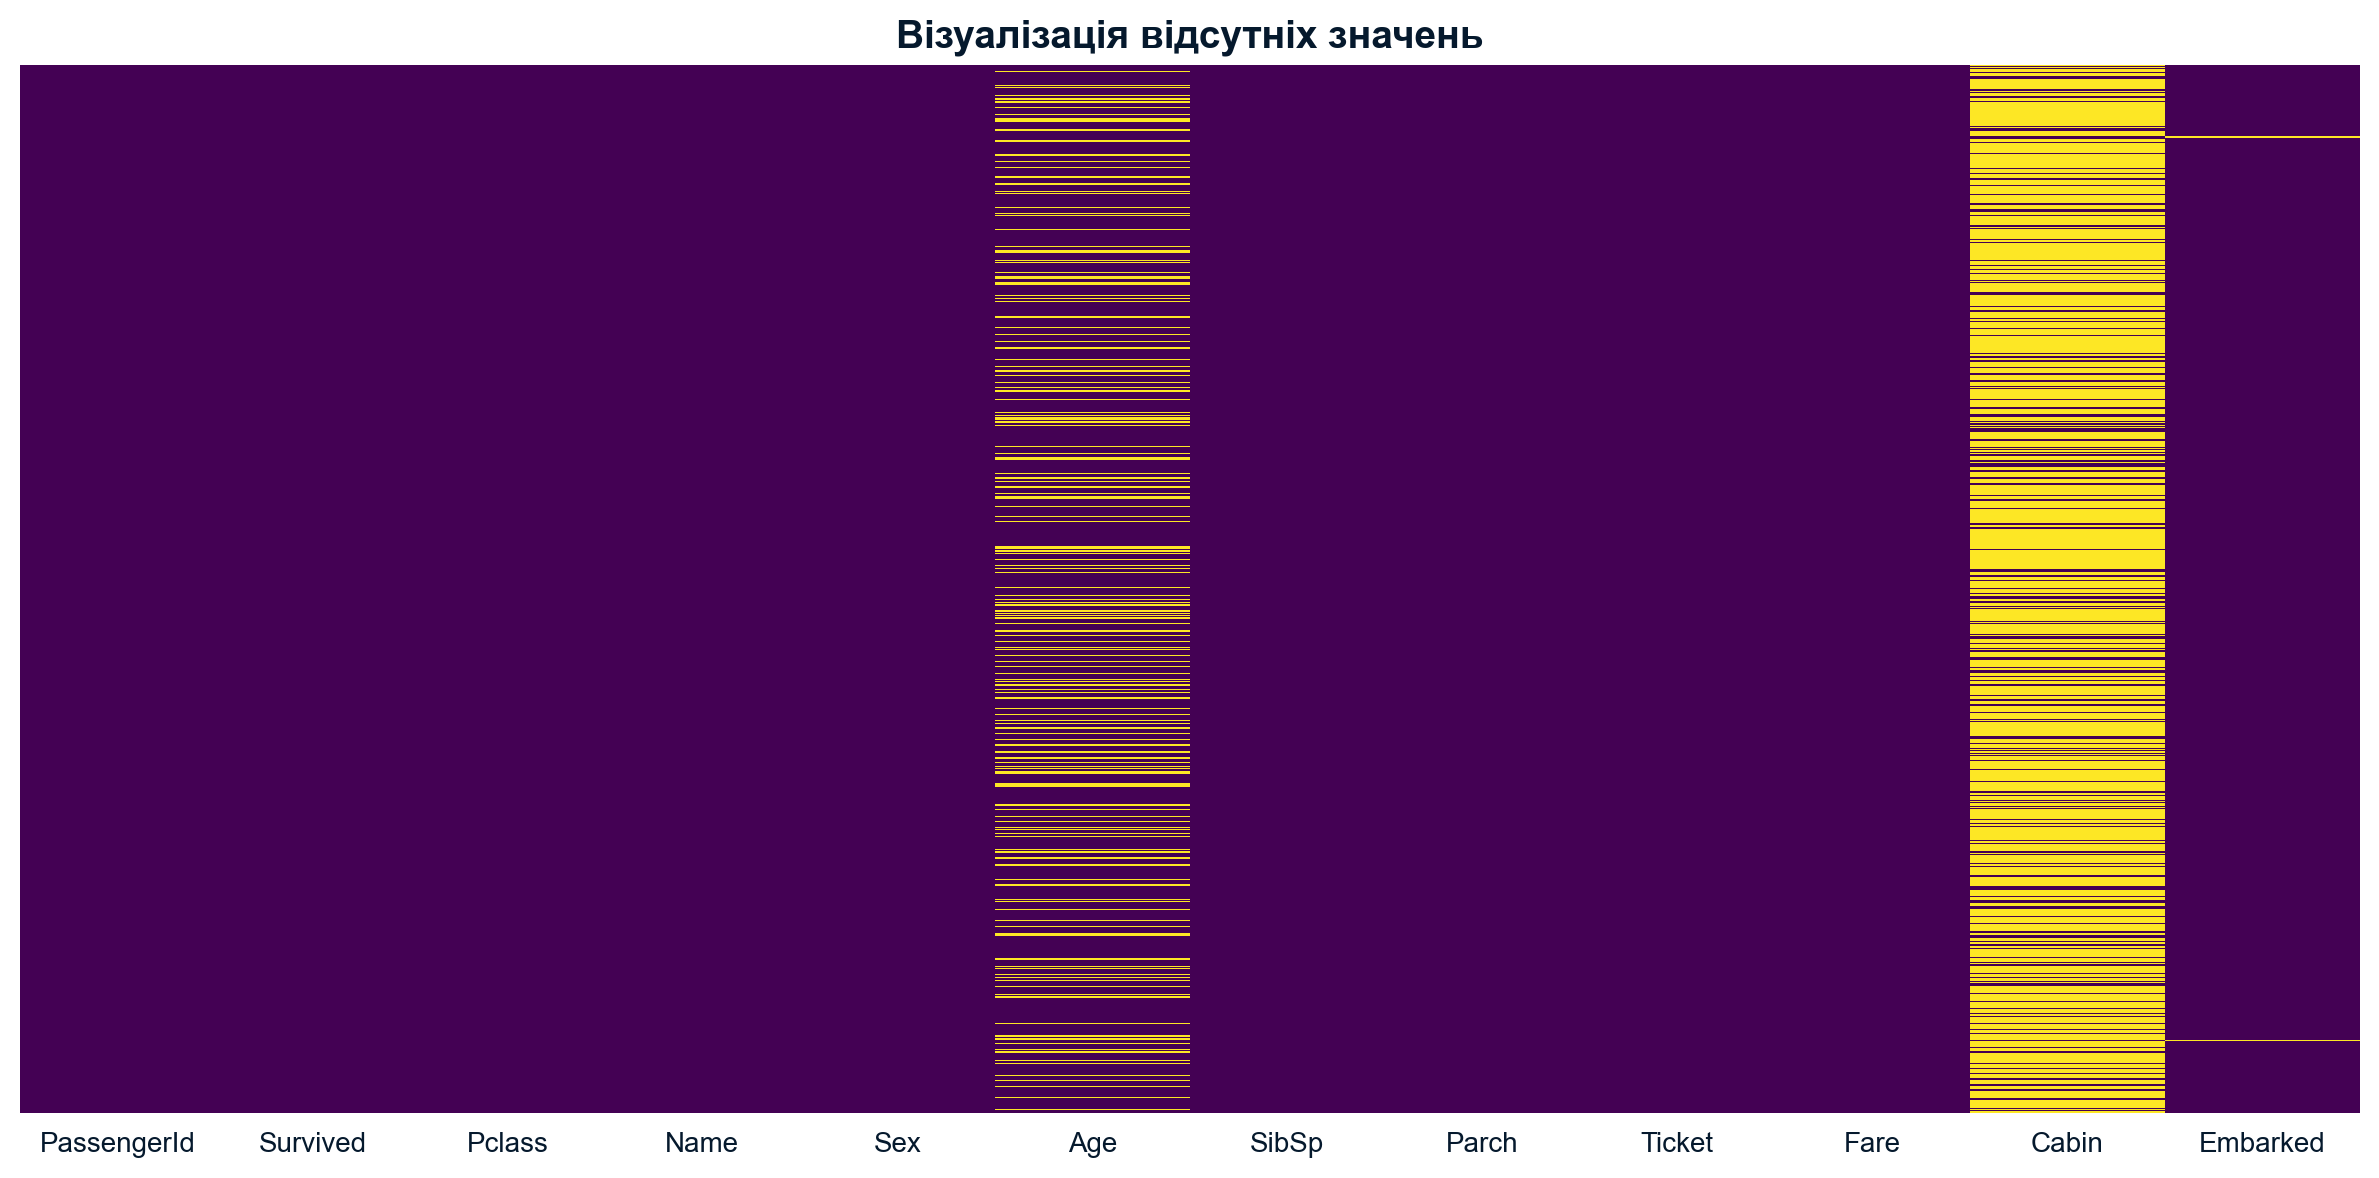

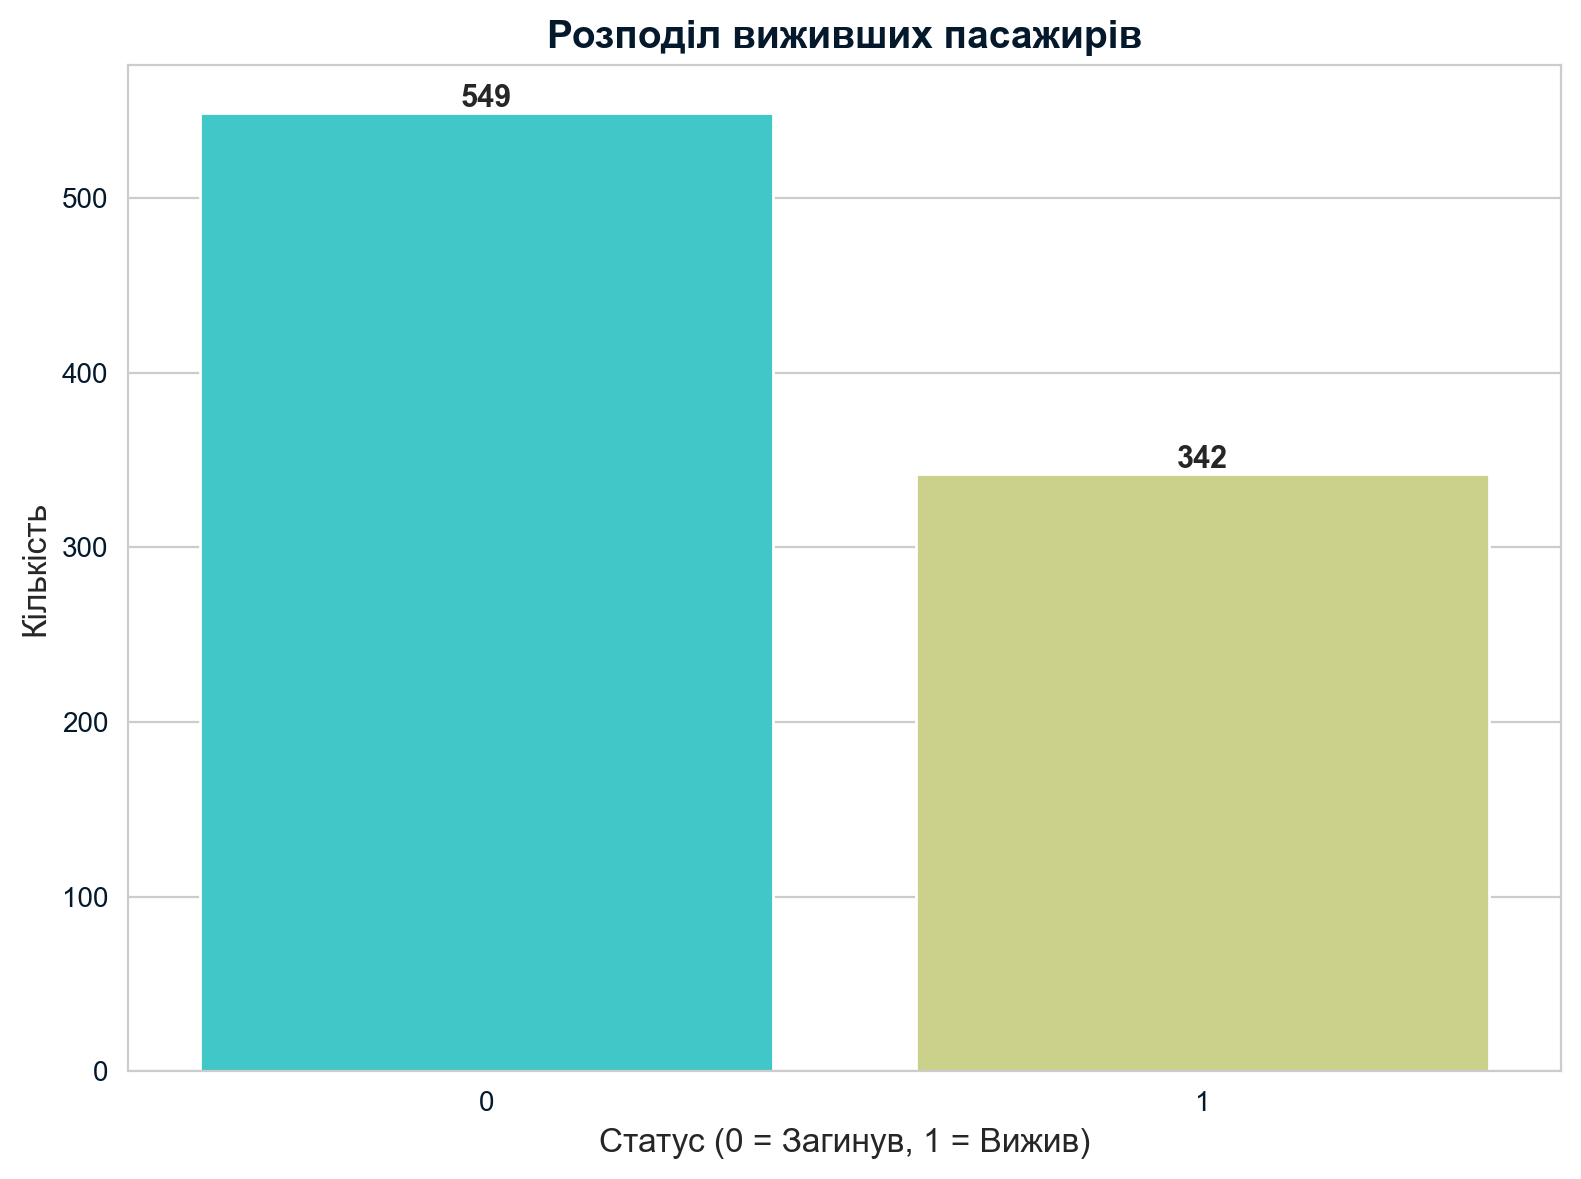

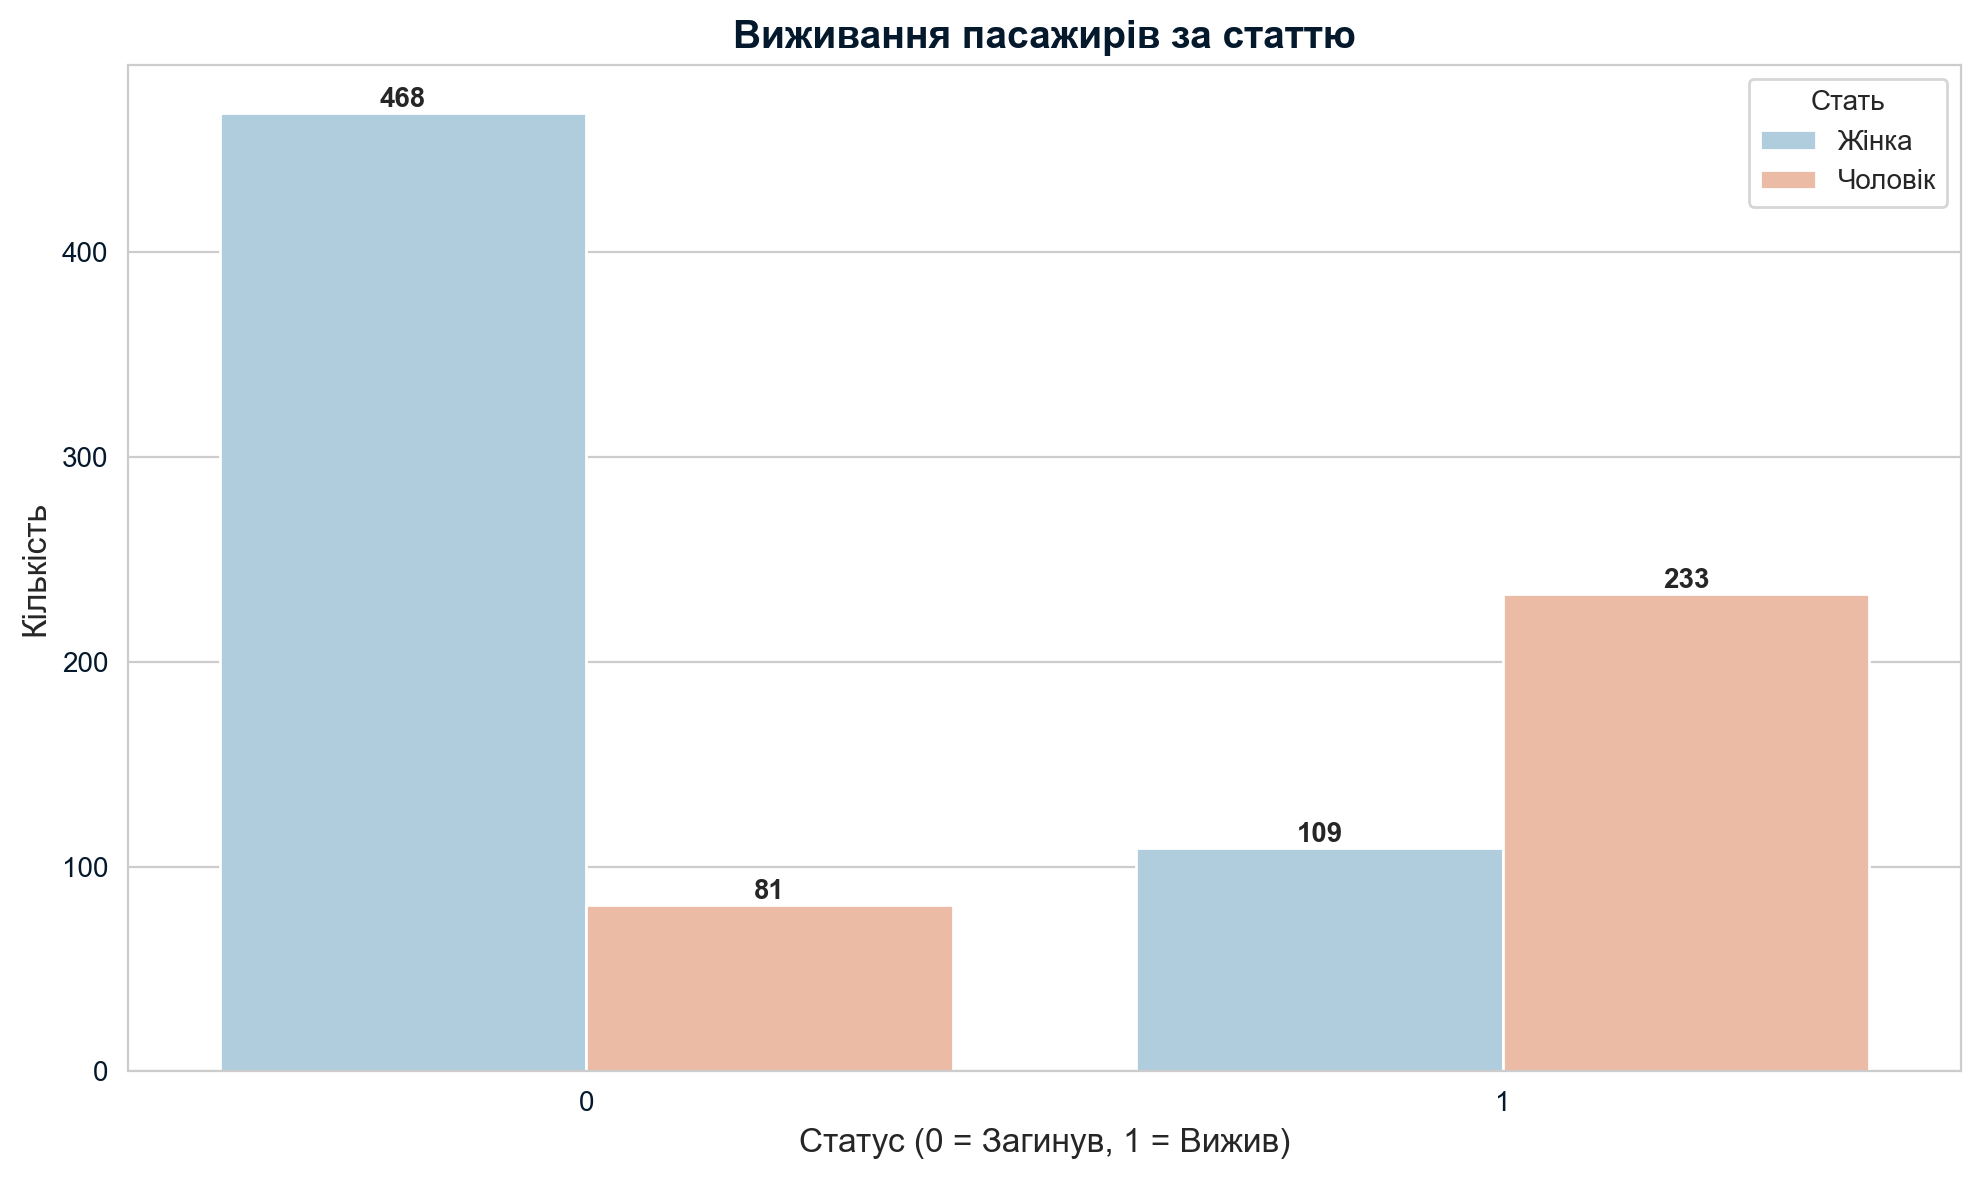

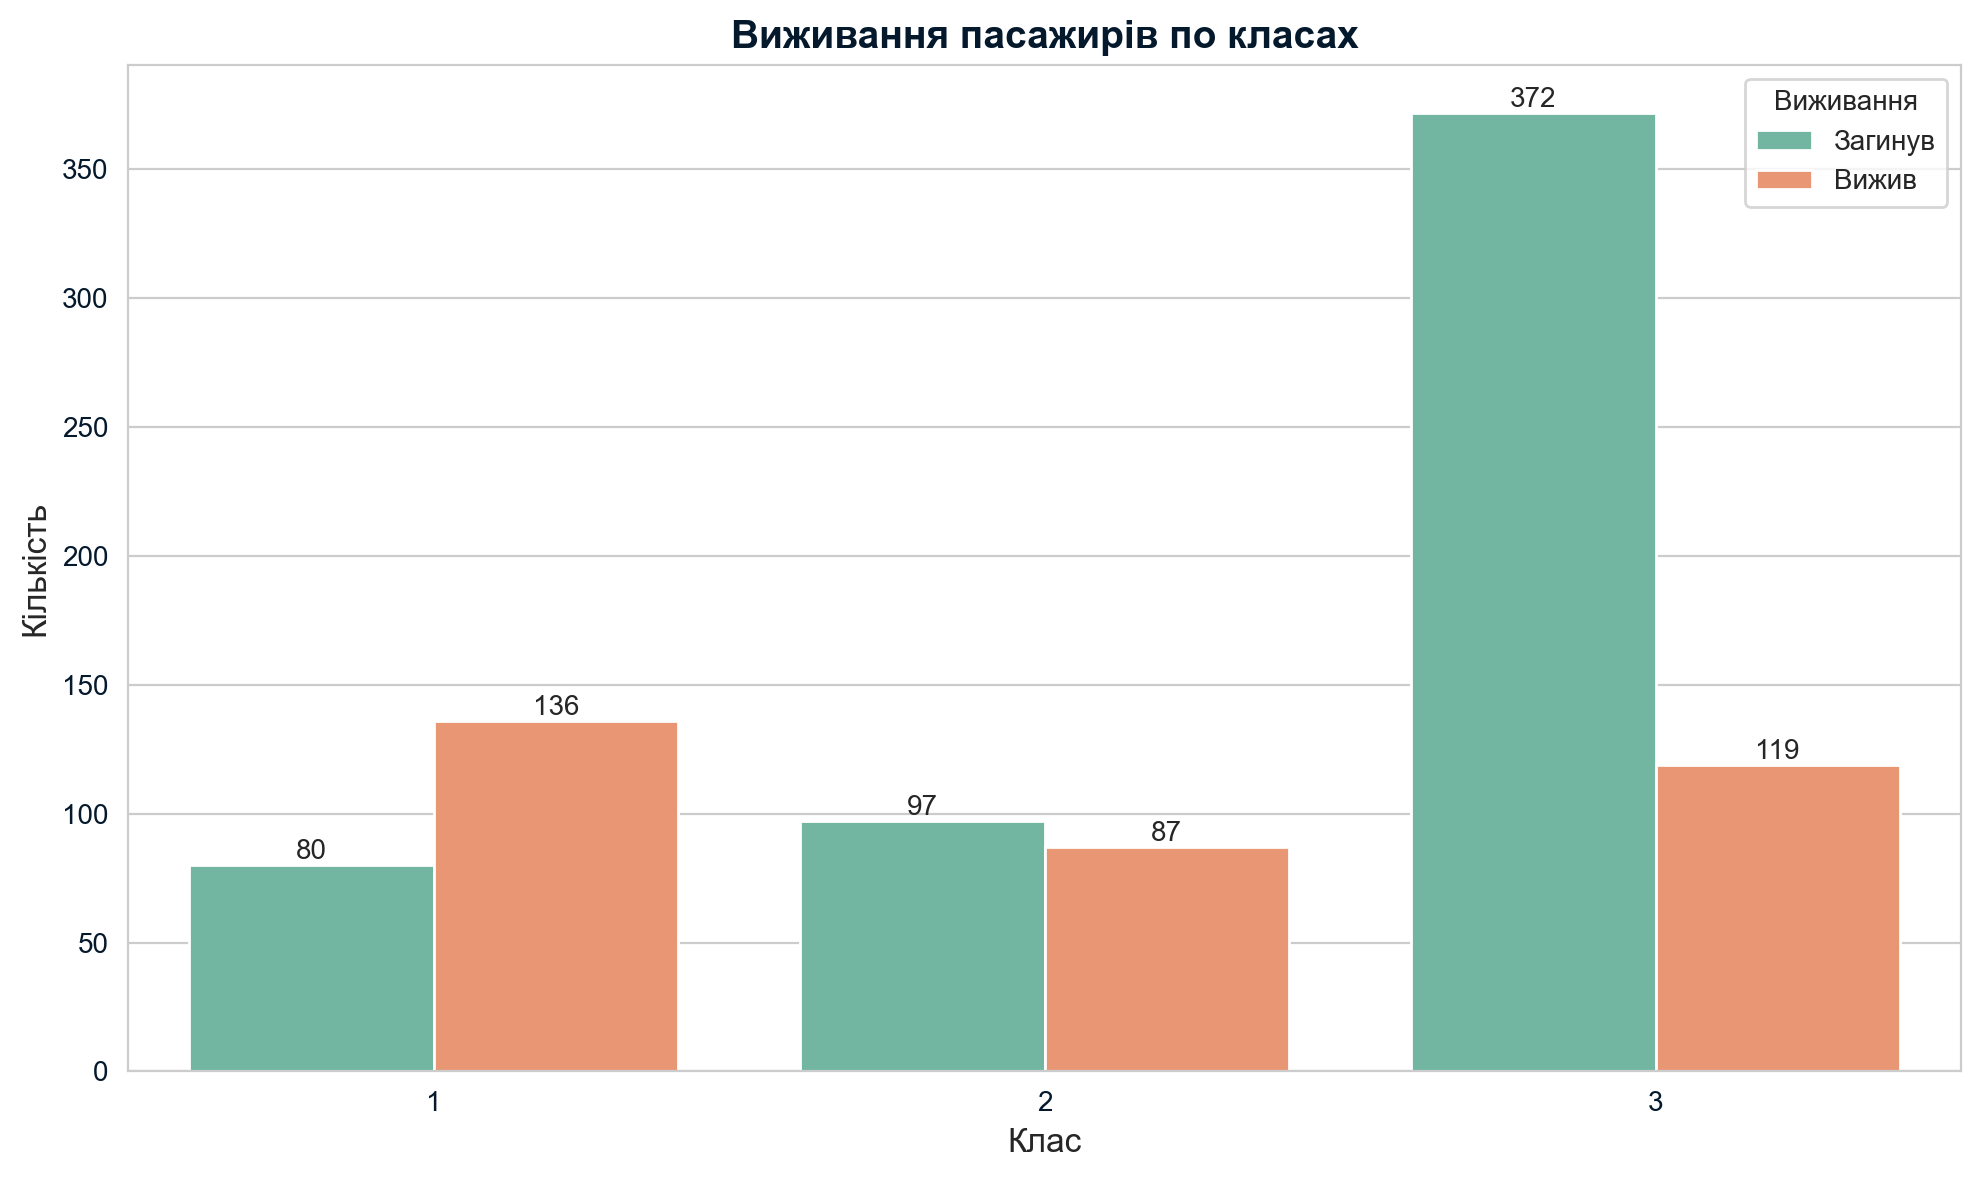

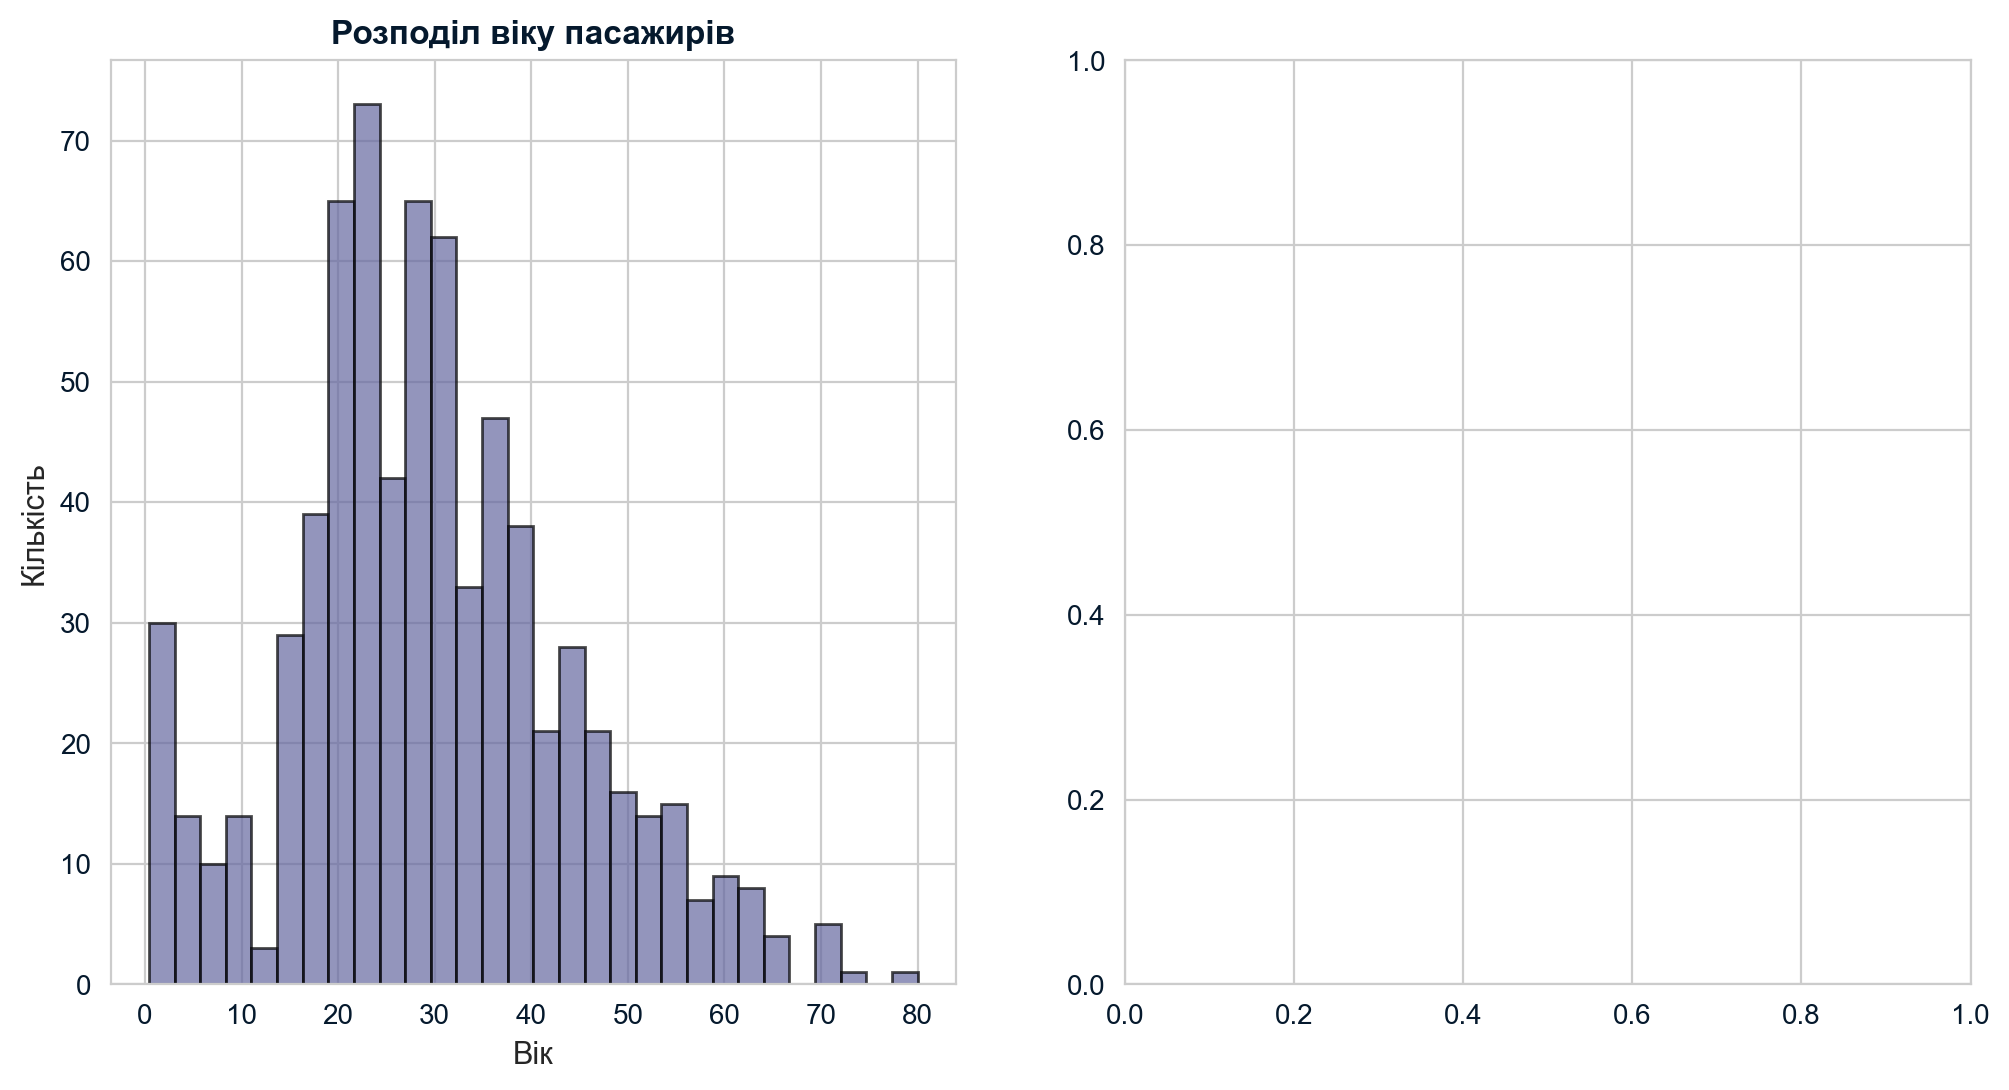

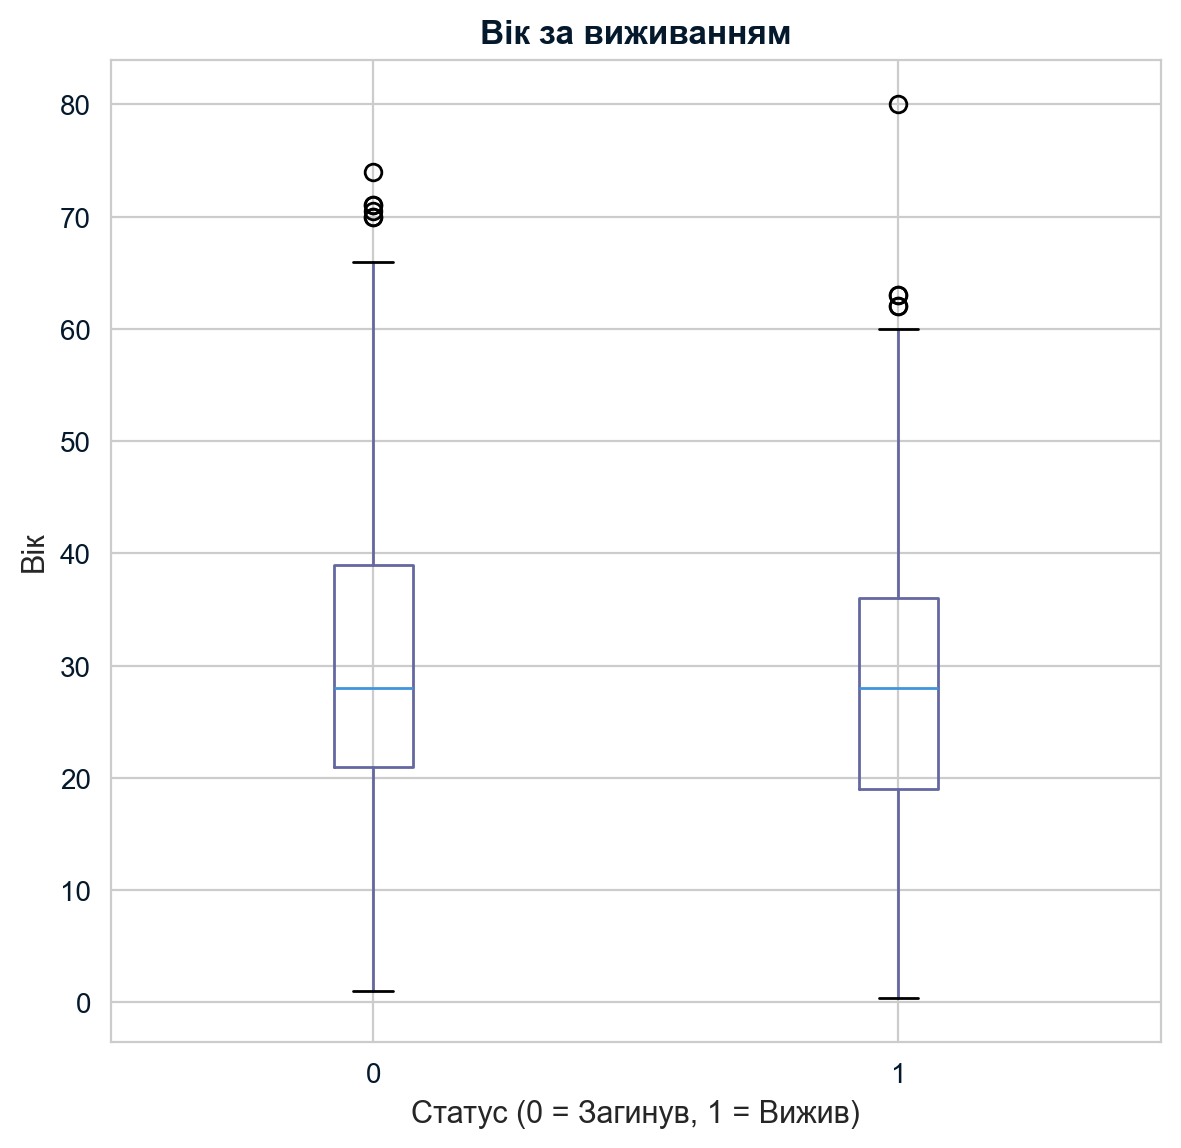

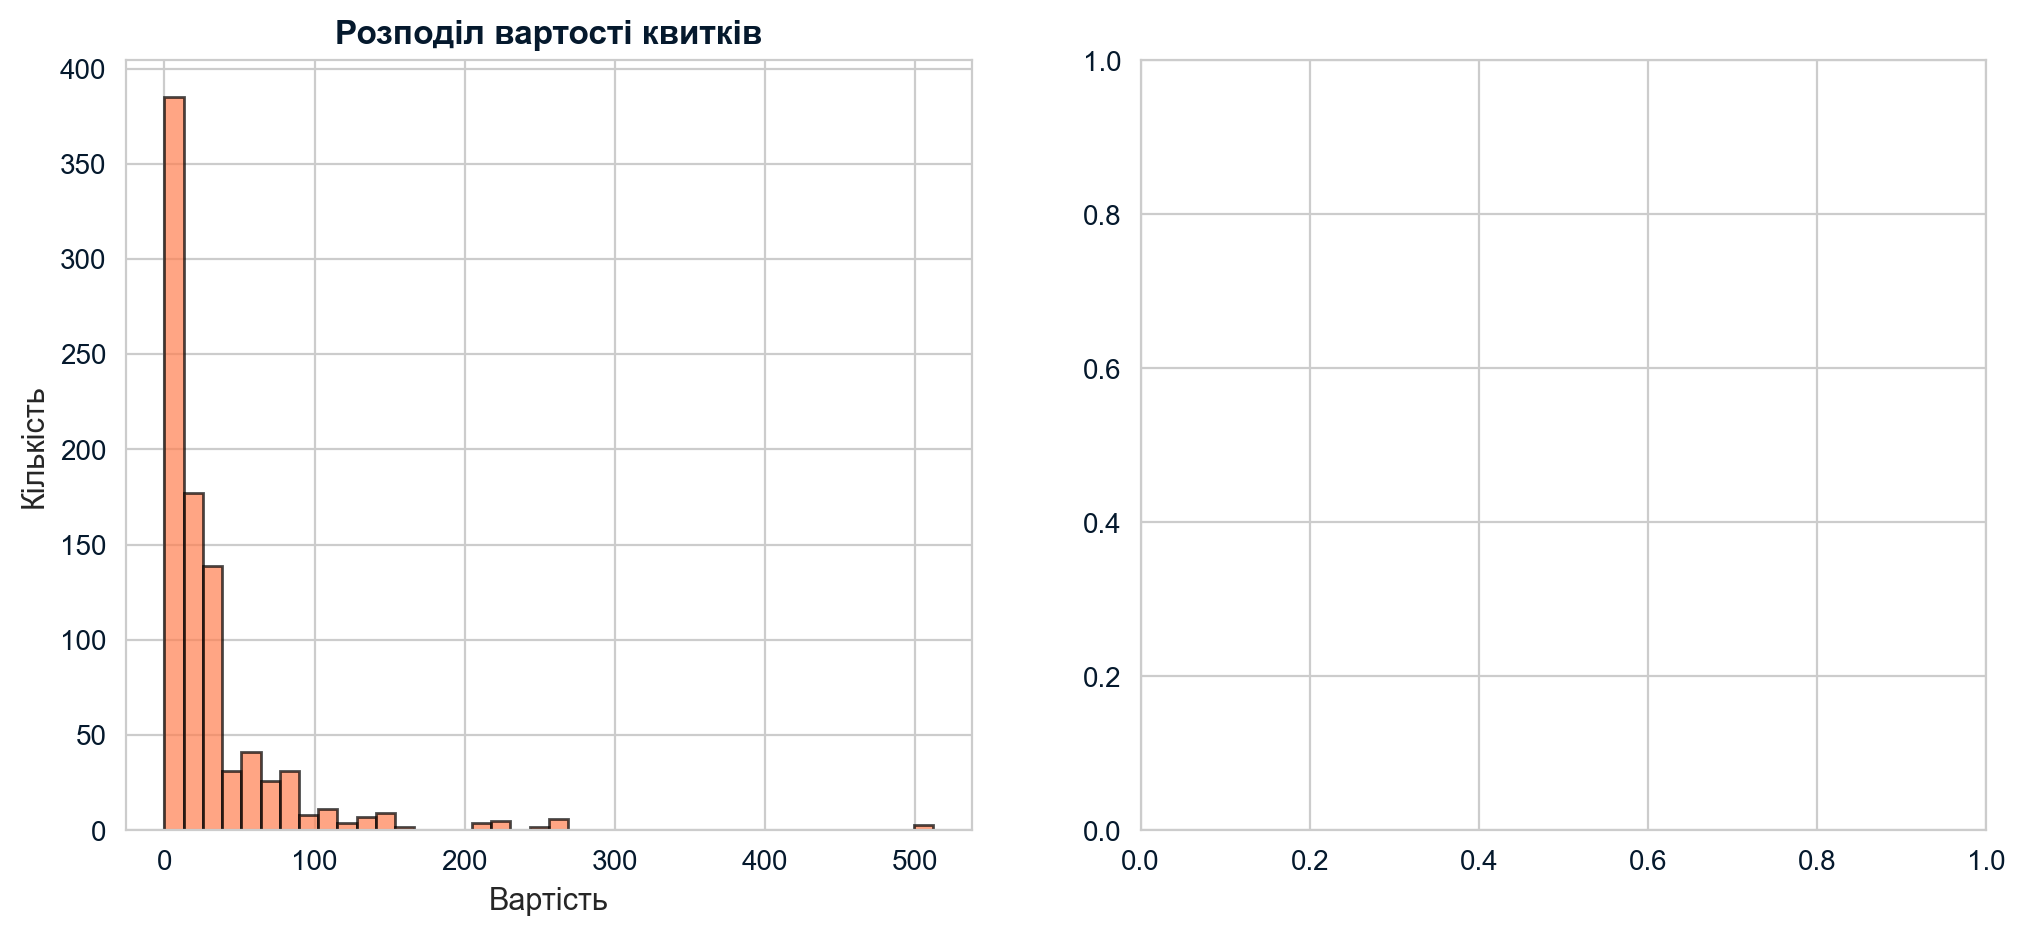

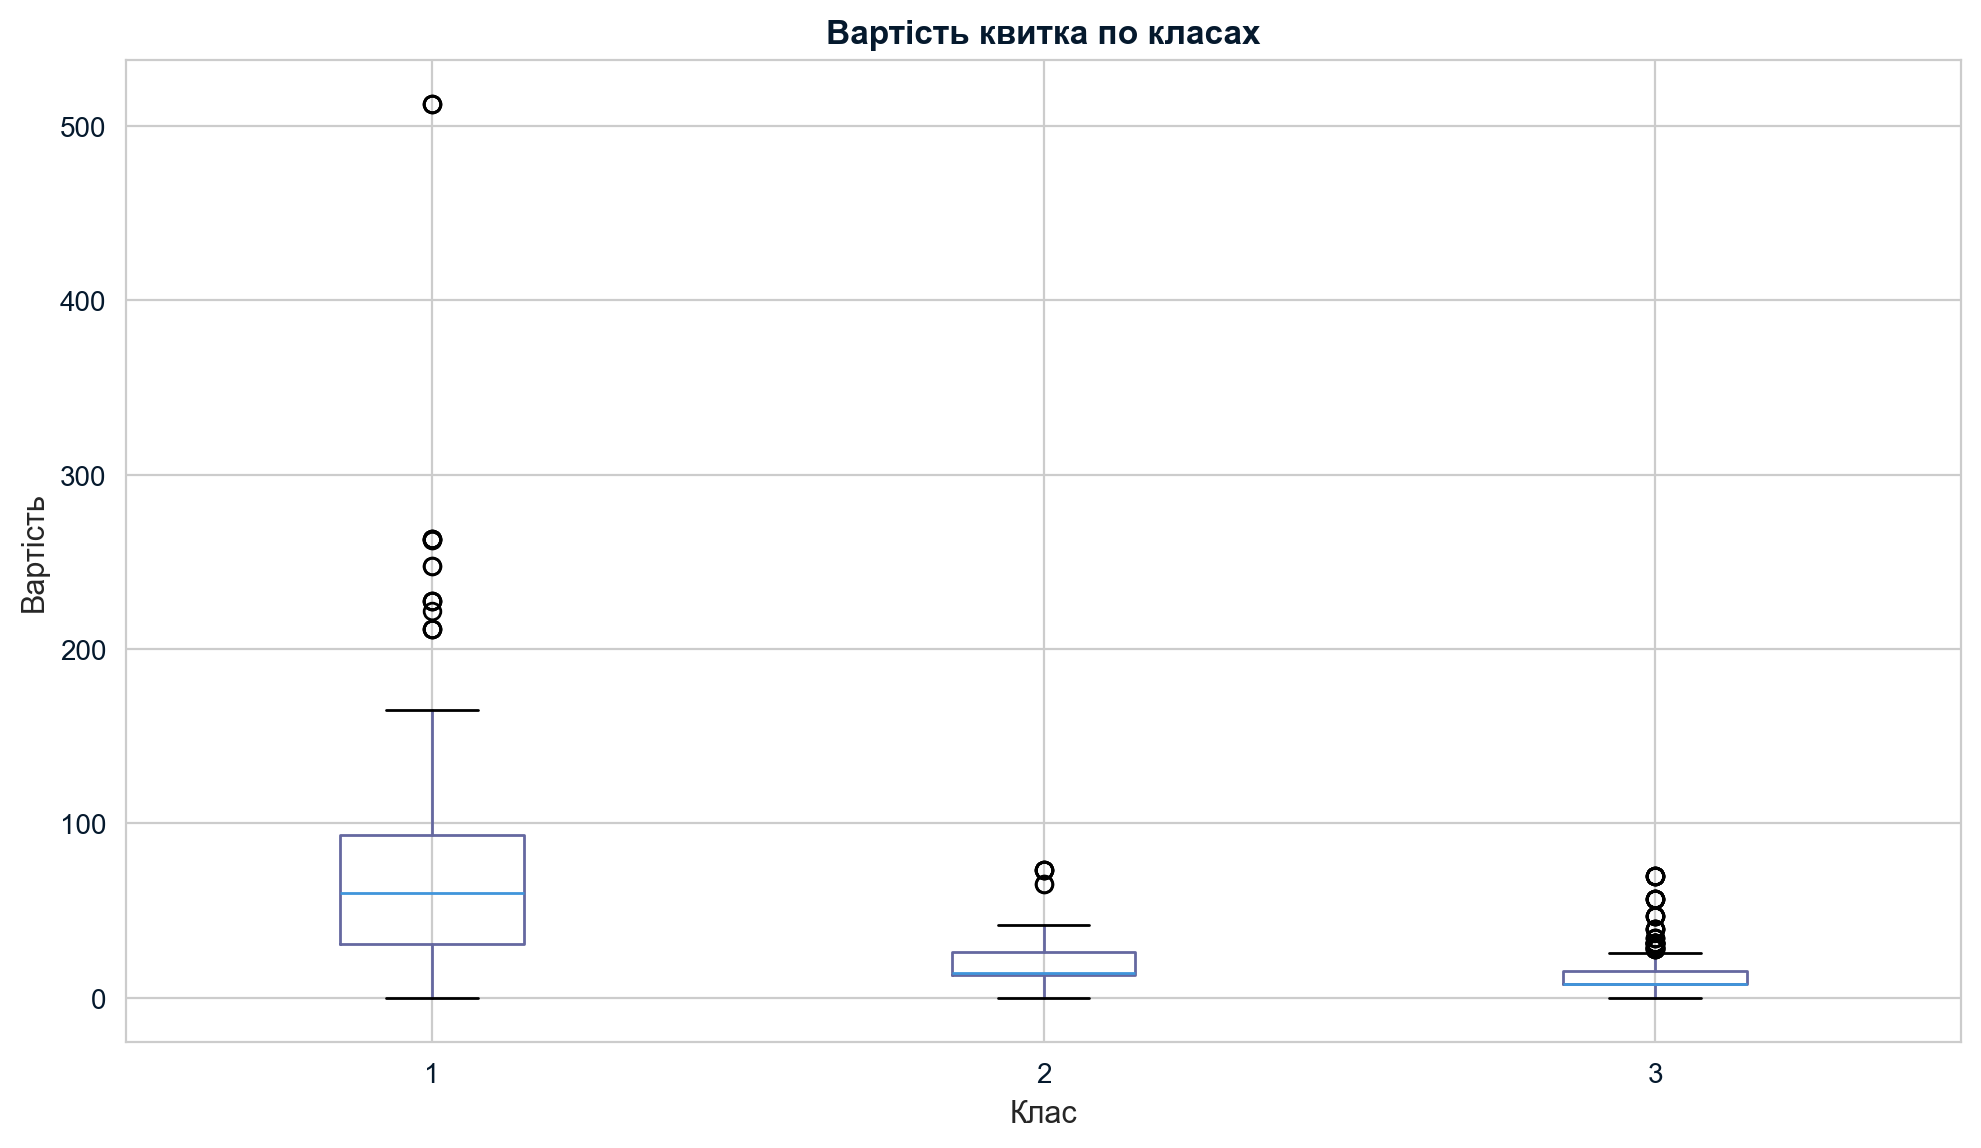

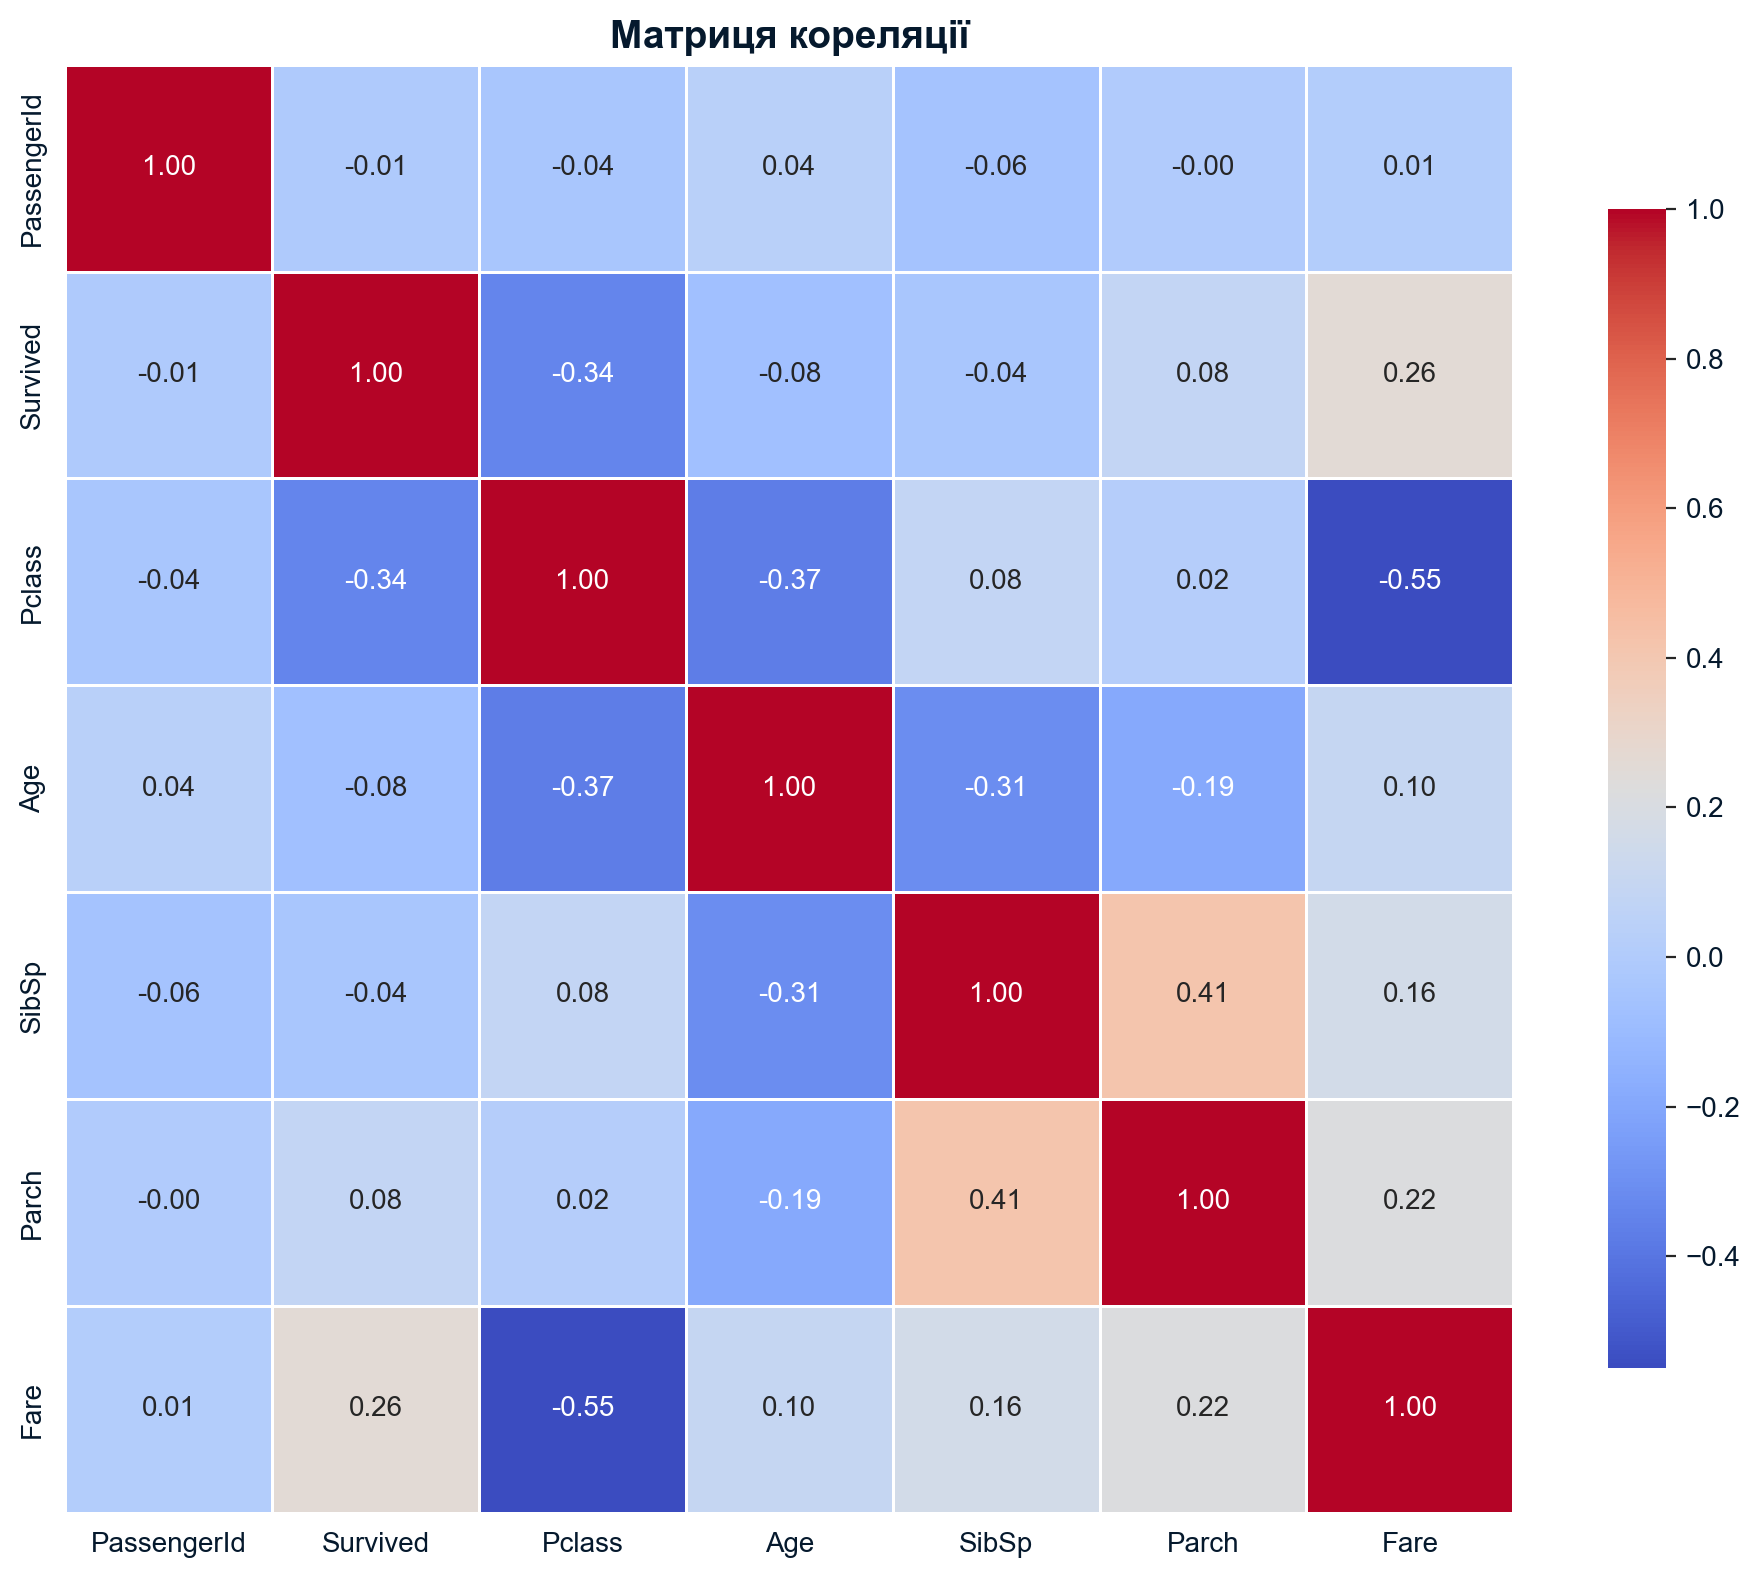

In [9]:
import pandas as pd
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt

# Налаштування для відображення графіків
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('whitegrid')

# Завантажуємо датасет Titanic з Kaggle
path = kagglehub.dataset_download("yasserh/titanic-dataset")
print("Шлях до датасету:", path)
print("\n")

# Читаємо CSV файл з завантаженої папки
df = pd.read_csv(f"{path}/Titanic-Dataset.csv")

# 1. Подивимось на перші 5 рядків
print("=== Перші 5 рядків датасету ===")
print(df.head())
print("\n")

# 2. Розмір датасету (рядки, колонки)
print(f"=== Розмір датасету ===")
print(f"Кількість рядків: {df.shape[0]}")
print(f"Кількість колонок: {df.shape[1]}")
print("\n")

# 3. Назви всіх колонок
print("=== Назви колонок ===")
print(df.columns.tolist())
print("\n")

# 4. Базова інформація про датасет
print("=== Інформація про датасет ===")
print(df.info())
print("\n")

# 5. Статистика по числових колонках
print("=== Статистика ===")
print(df.describe())
print(df['Survived'].describe())
print("\n")

# 6. Скільки людей вижило?
print("=== Виживання пасажирів ===")
print(f"Вижило: {df['Survived'].sum()} людей")
print(f"Загинуло: {len(df) - df['Survived'].sum()} людей")
print("\n")

# 7. Середній вік пасажирів
print("=== Вік пасажирів ===")
print(f"Середній вік: {df['Age'].mean():.1f} років")
print("\n")

# 8. Кількість чоловіків і жінок
print("=== Розподіл за статтю ===")
print(df['Sex'].value_counts())
print("\n")

# 9. Виживання по класах
print("=== Виживання по класах ===")
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_class)
print("\n")

# ----------------------------------------------------
# ГРАФІКИ (з виправленнями)
# ----------------------------------------------------

# Графік 1: Heatmap відсутніх значень
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Візуалізація відсутніх значень', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Графік 2: Кількість виживших
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
ax = sns.countplot(x='Survived', data=df, palette='rainbow')
plt.title('Розподіл виживших пасажирів', fontsize=14, fontweight='bold')
plt.xlabel('Статус (0 = Загинув, 1 = Вижив)', fontsize=12)
plt.ylabel('Кількість', fontsize=12)

# Додаємо підписи на стовпчиках
for container in ax.containers:
    ax.bar_label(container, fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Графік 3: Виживання за статтю
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
ax = sns.countplot(x='Survived', hue='Sex', data=df, palette='RdBu_r')
plt.title('Виживання пасажирів за статтю', fontsize=14, fontweight='bold')
plt.xlabel('Статус (0 = Загинув, 1 = Вижив)', fontsize=12)
plt.ylabel('Кількість', fontsize=12)
plt.legend(title='Стать', labels=['Жінка', 'Чоловік'])

# Додаємо підписи на стовпчиках
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# ДОДАТКОВІ КОРИСНІ ГРАФІКИ
# ----------------------------------------------------

# Графік 4: Виживання по класах
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title('Виживання пасажирів по класах', fontsize=14, fontweight='bold')
plt.xlabel('Клас', fontsize=12)
plt.ylabel('Кількість', fontsize=12)
plt.legend(title='Виживання', labels=['Загинув', 'Вижив'])

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.tight_layout()
plt.show()

# Графік 5: Розподіл віку
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Age'].hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Розподіл віку пасажирів', fontsize=12, fontweight='bold')
plt.xlabel('Вік', fontsize=11)
plt.ylabel('Кількість', fontsize=11)

plt.subplot(1, 2, 2)
df.boxplot(column='Age', by='Survived', figsize=(6, 6))
plt.title('Вік за виживанням', fontsize=12, fontweight='bold')
plt.suptitle('')  # Вимикаємо автоматичний заголовок
plt.xlabel('Статус (0 = Загинув, 1 = Вижив)', fontsize=11)
plt.ylabel('Вік', fontsize=11)

plt.tight_layout()
plt.show()

# Графік 6: Вартість квитка
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['Fare'].hist(bins=40, edgecolor='black', alpha=0.7, color='coral')
plt.title('Розподіл вартості квитків', fontsize=12, fontweight='bold')
plt.xlabel('Вартість', fontsize=11)
plt.ylabel('Кількість', fontsize=11)

plt.subplot(1, 2, 2)
df.boxplot(column='Fare', by='Pclass')
plt.title('Вартість квитка по класах', fontsize=12, fontweight='bold')
plt.suptitle('')
plt.xlabel('Клас', fontsize=11)
plt.ylabel('Вартість', fontsize=11)

plt.tight_layout()
plt.show()

# Графік 7: Матриця кореляції
plt.figure(figsize=(10, 8))
# Вибираємо тільки числові колонки
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Матриця кореляції', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Збереження обробленого датасету (опціонально)
# df.to_csv('titanic_processed.csv', index=False)
# print("Датасет збережено у файл titanic_processed.csv")
